In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
featuresDF = pd.read_csv("features.csv")
featuresDF

x1        x2        x3        x4        x5        x6        x7  \
0   -0.008763  0.001770  0.010446 -0.007264  0.004724  0.008800 -0.017919   
1   -0.009820  0.009675 -0.035837 -0.020312  0.006930  0.036925 -0.035215   
2   -0.008362  0.032523 -0.017077 -0.005372 -0.017278  0.001761 -0.009824   
3    0.001112  0.010383  0.021889  0.021950  0.007332 -0.011565  0.007420   
4    0.011250 -0.004752  0.004993  0.016260 -0.015250 -0.013459  0.040848   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.014778 -0.004468 -0.015341  0.004757  0.011841  0.002007  0.013082   
996 -0.014106 -0.025678 -0.015926 -0.014217  0.023251  0.013802 -0.014831   
997 -0.007006  0.013404 -0.008934  0.000964  0.004188  0.006766 -0.004286   
998  0.000626  0.017429 -0.000916  0.043471 -0.011593  0.004590  0.026052   
999 -0.002601 -0.018135  0.014241 -0.024084  0.020633 -0.004302 -0.031420   

           x8        x9       x10  ...       x12       x13       x14  \
0   -0.016258 -0.008299 -0.014621  ...  0.006303 -0.015848  0.009249   
1   -0.008280 -0.035210  0.004720  ...  0.008890  0.021302  0.011256   
2    0.006557 -0.007443 -0.001127  ... -0.004936 -0.001141  0.008117   
3   -0.020697  0.014531 -0.000314  ...  0.007837 -0.010262 -0.005631   
4    0.009176  0.021054  0.008277  ... -0.024464 -0.003579 -0.014969   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.009240  0.008017 -0.002254  ... -0.003915 -0.006777  0.018189   
996  0.011226 -0.012182  0.003630  ...  0.015589  0.006167 -0.002880   
997  0.000394 -0.006415  0.002094  ...  0.003168  0.003934  0.003437   
998  0.007109  0.022681  0.015859  ... -0.009597 -0.000519 -0.022338   
999  0.007858 -0.023295 -0.001743  ...  0.019954  0.004218  0.014068   

          x15       x16       x17       x18       x19       x20     target  
0   -0.007695  0.006360  0.001814  0.018827 -0.002751  0.011877  -7.146416  
1    0.012020  0.023055 -0.036148 -0.008922  0.003422  0.014325  -4.982838  
2    0.000905  0.002428  0.005257  0.012173  0.004801  0.003105  -2.812562  
3   -0.018528  0.006506  0.009414 -0.013356  0.006852  0.007704  19.708300  
4   -0.013871  0.002806  0.024182 -0.003080 -0.001399  0.014814   1.134560  
..        ...       ...       ...       ...       ...       ...        ...  
995 -0.000968 -0.008840 -0.002759 -0.009887 -0.006854 -0.005794  22.257292  
996  0.010108  0.006171 -0.003957  0.006225 -0.009715 -0.019390   8.770747  
997  0.004853 -0.006378  0.000155 -0.001300  0.008242 -0.006347 -13.730166  
998 -0.034572  0.005036  0.017529 -0.014505  0.015133  0.011968  19.415088  
999  0.017379 -0.017244  0.001289  0.006566 -0.016357 -0.003295   9.793446  

[1000 rows x 21 columns]

# Data cleaning - No null values, no nan, no empties 

In [3]:
#Check if there are null values
featuresDF.isnull().sum()

#check for nan
featuresDF.isna().sum()

featuresDF
# no Nan, empties or nulls.

x1        x2        x3        x4        x5        x6        x7  \
0   -0.008763  0.001770  0.010446 -0.007264  0.004724  0.008800 -0.017919   
1   -0.009820  0.009675 -0.035837 -0.020312  0.006930  0.036925 -0.035215   
2   -0.008362  0.032523 -0.017077 -0.005372 -0.017278  0.001761 -0.009824   
3    0.001112  0.010383  0.021889  0.021950  0.007332 -0.011565  0.007420   
4    0.011250 -0.004752  0.004993  0.016260 -0.015250 -0.013459  0.040848   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.014778 -0.004468 -0.015341  0.004757  0.011841  0.002007  0.013082   
996 -0.014106 -0.025678 -0.015926 -0.014217  0.023251  0.013802 -0.014831   
997 -0.007006  0.013404 -0.008934  0.000964  0.004188  0.006766 -0.004286   
998  0.000626  0.017429 -0.000916  0.043471 -0.011593  0.004590  0.026052   
999 -0.002601 -0.018135  0.014241 -0.024084  0.020633 -0.004302 -0.031420   

           x8        x9       x10  ...       x12       x13       x14  \
0   -0.016258 -0.008299 -0.014621  ...  0.006303 -0.015848  0.009249   
1   -0.008280 -0.035210  0.004720  ...  0.008890  0.021302  0.011256   
2    0.006557 -0.007443 -0.001127  ... -0.004936 -0.001141  0.008117   
3   -0.020697  0.014531 -0.000314  ...  0.007837 -0.010262 -0.005631   
4    0.009176  0.021054  0.008277  ... -0.024464 -0.003579 -0.014969   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.009240  0.008017 -0.002254  ... -0.003915 -0.006777  0.018189   
996  0.011226 -0.012182  0.003630  ...  0.015589  0.006167 -0.002880   
997  0.000394 -0.006415  0.002094  ...  0.003168  0.003934  0.003437   
998  0.007109  0.022681  0.015859  ... -0.009597 -0.000519 -0.022338   
999  0.007858 -0.023295 -0.001743  ...  0.019954  0.004218  0.014068   

          x15       x16       x17       x18       x19       x20     target  
0   -0.007695  0.006360  0.001814  0.018827 -0.002751  0.011877  -7.146416  
1    0.012020  0.023055 -0.036148 -0.008922  0.003422  0.014325  -4.982838  
2    0.000905  0.002428  0.005257  0.012173  0.004801  0.003105  -2.812562  
3   -0.018528  0.006506  0.009414 -0.013356  0.006852  0.007704  19.708300  
4   -0.013871  0.002806  0.024182 -0.003080 -0.001399  0.014814   1.134560  
..        ...       ...       ...       ...       ...       ...        ...  
995 -0.000968 -0.008840 -0.002759 -0.009887 -0.006854 -0.005794  22.257292  
996  0.010108  0.006171 -0.003957  0.006225 -0.009715 -0.019390   8.770747  
997  0.004853 -0.006378  0.000155 -0.001300  0.008242 -0.006347 -13.730166  
998 -0.034572  0.005036  0.017529 -0.014505  0.015133  0.011968  19.415088  
999  0.017379 -0.017244  0.001289  0.006566 -0.016357 -0.003295   9.793446  

[1000 rows x 21 columns]

# Outlier Detection - visually, then KNN

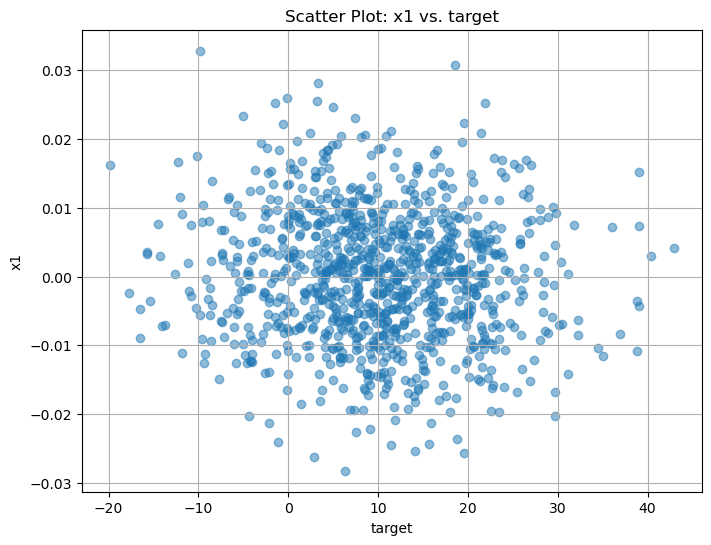

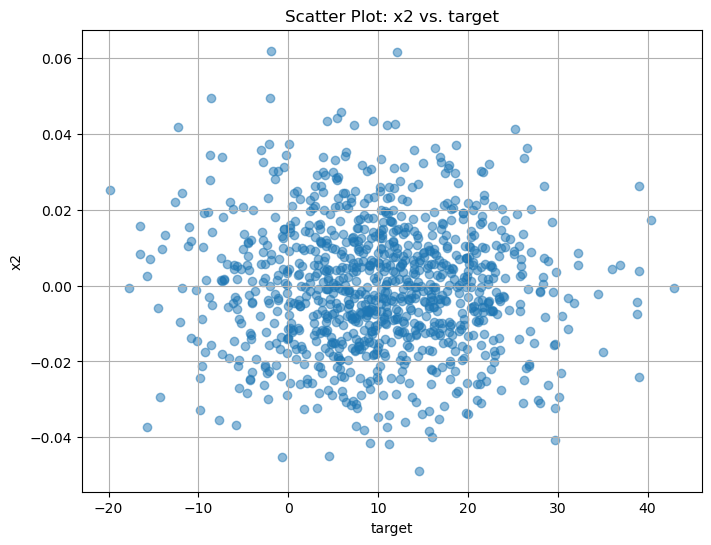

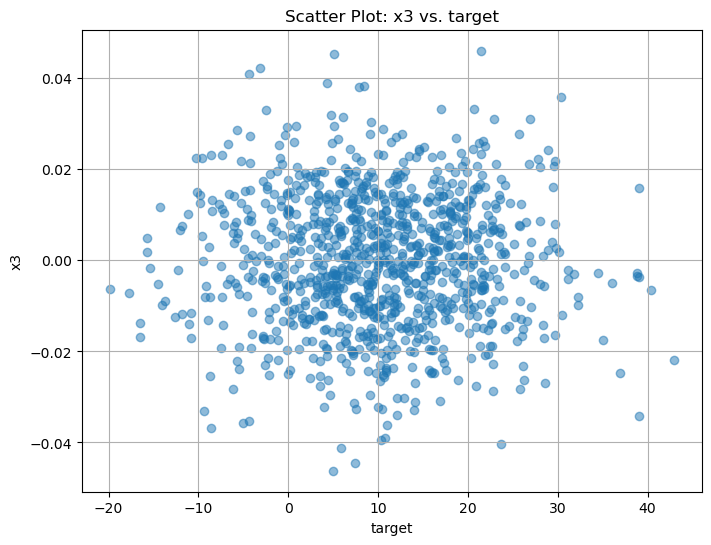

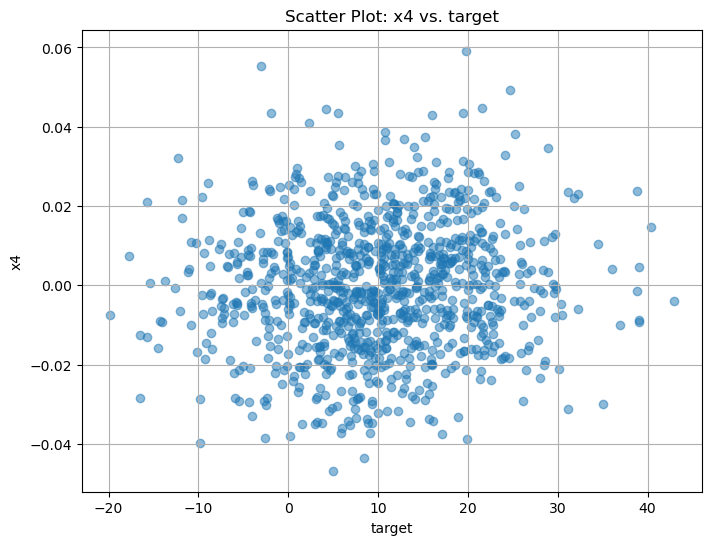

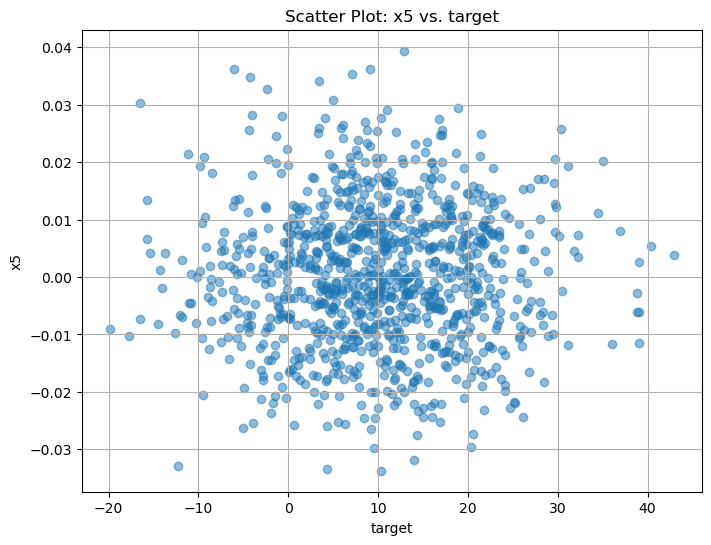

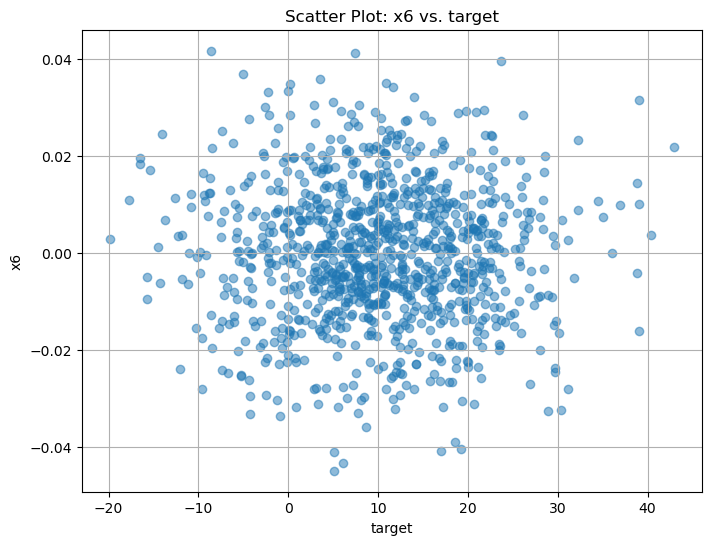

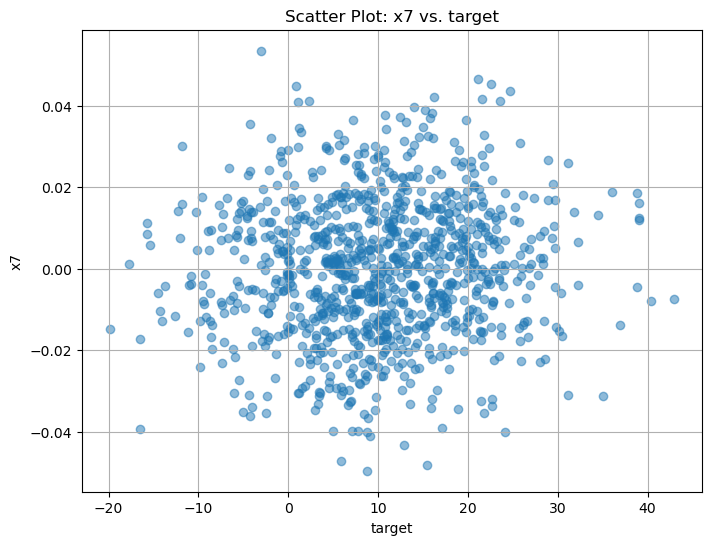

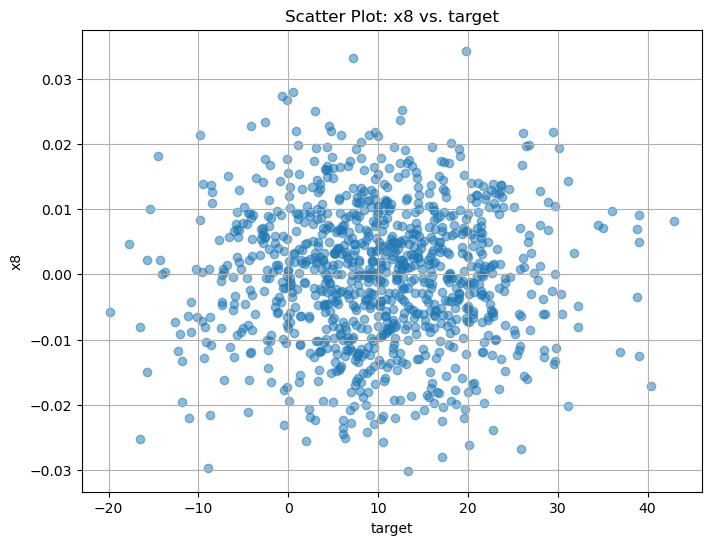

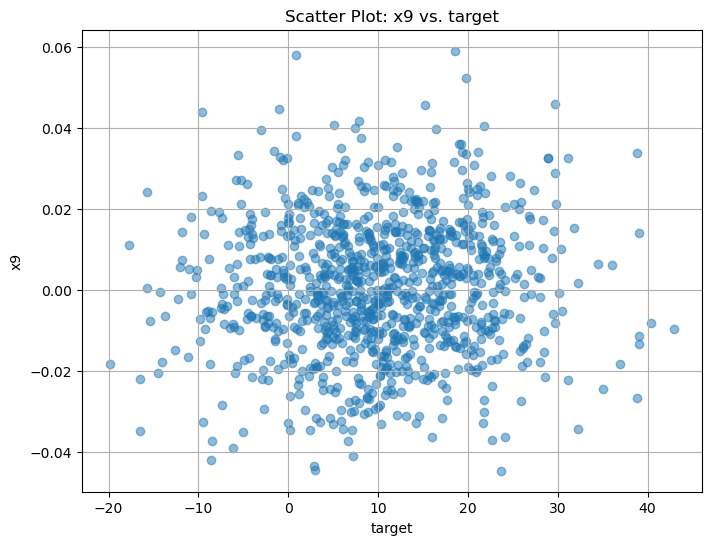

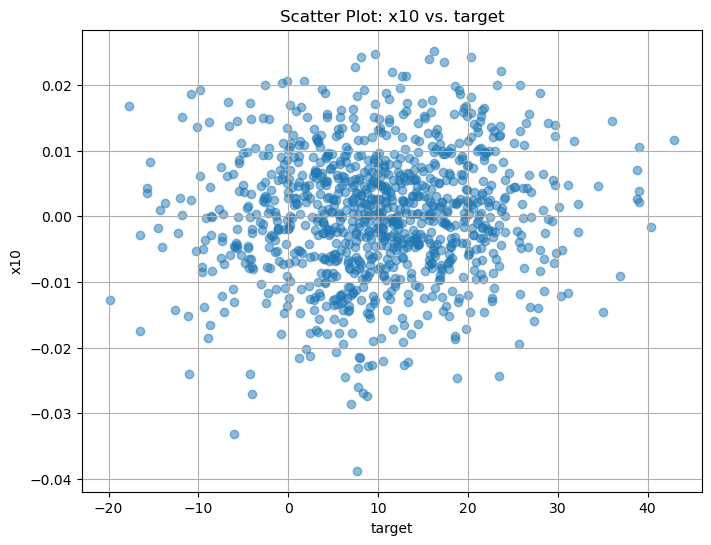

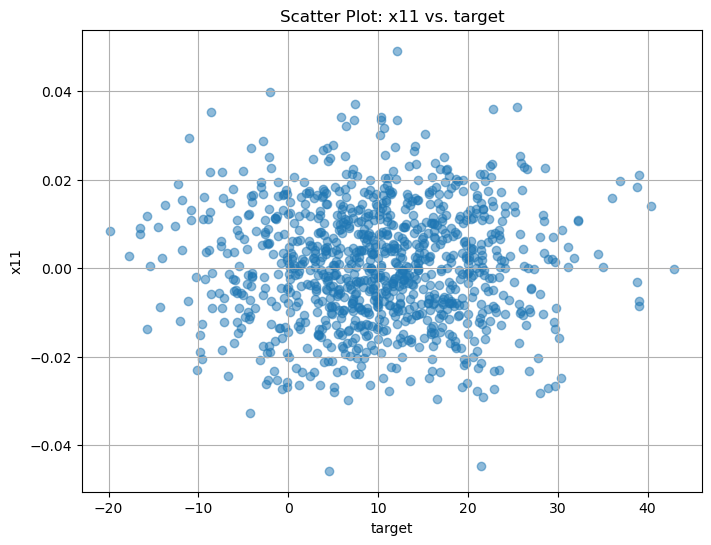

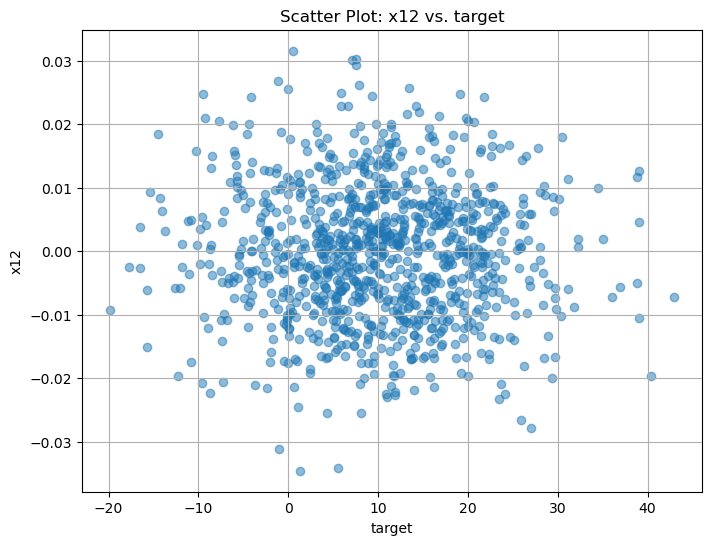

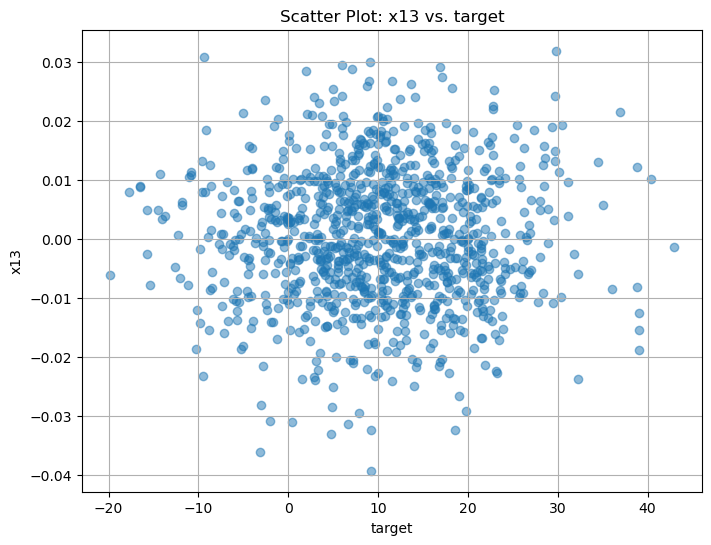

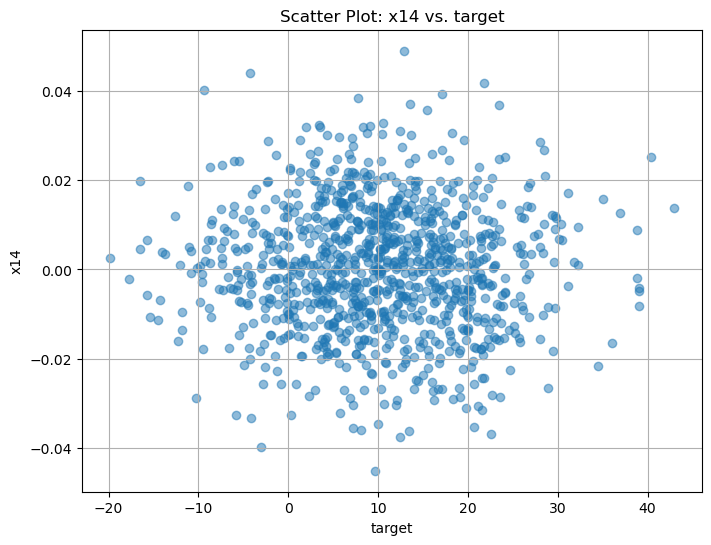

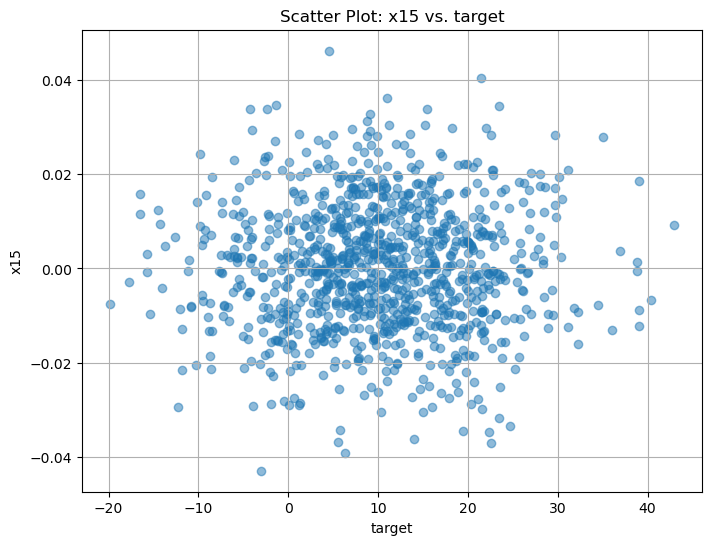

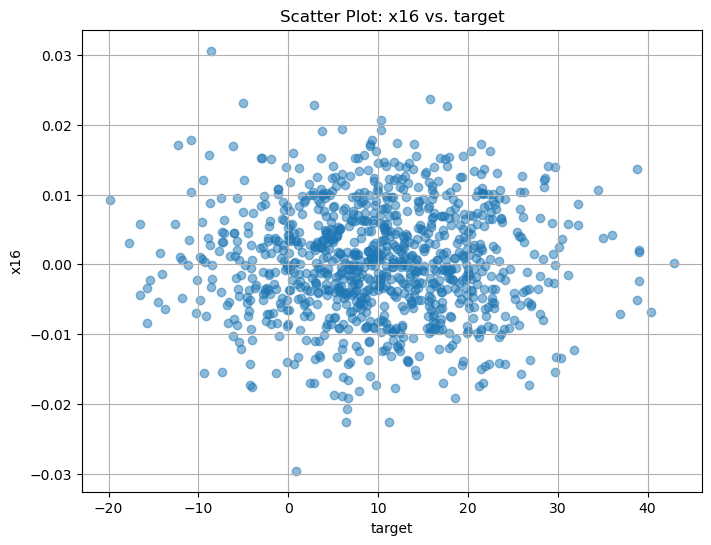

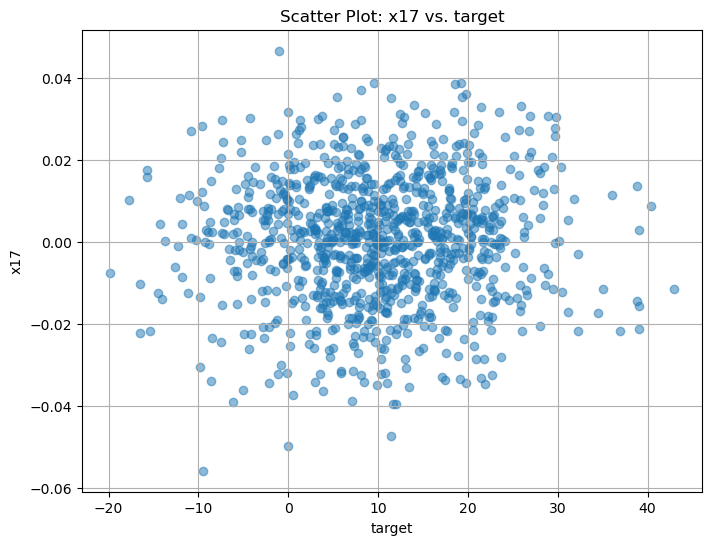

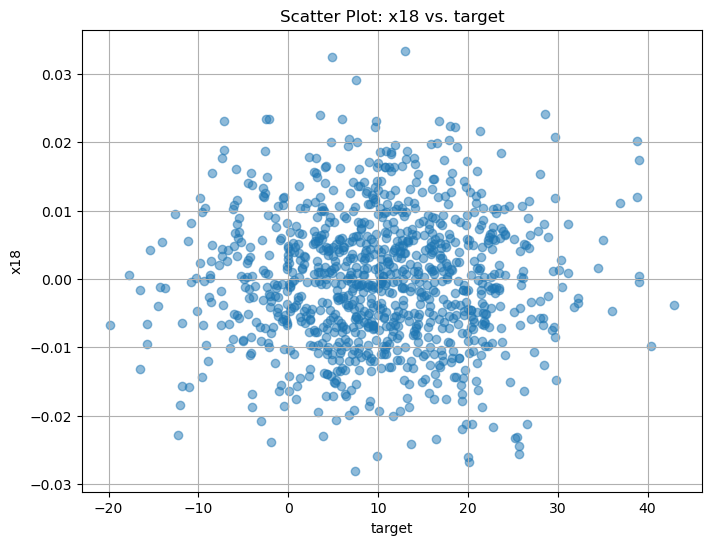

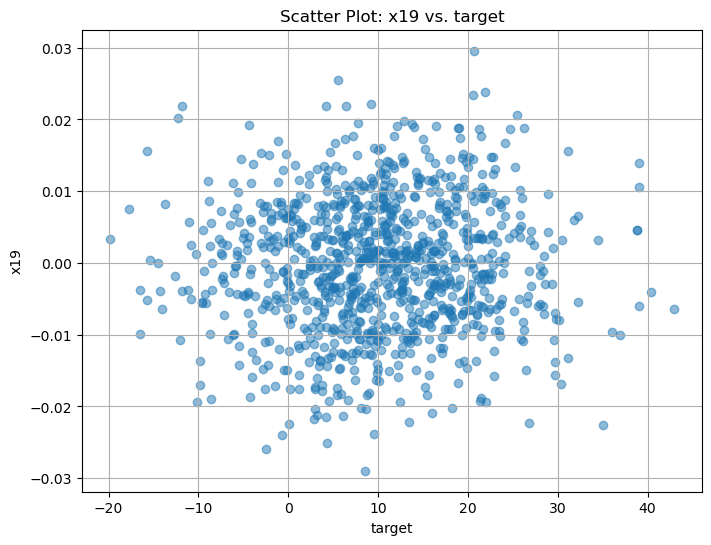

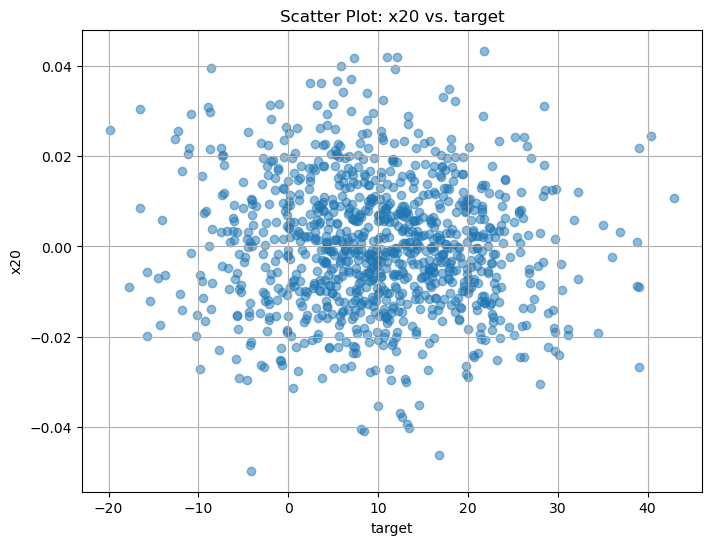

In [4]:
# gotta check visually for outliers
columns = featuresDF.columns

#lets go through each column and plot them against our target column
for column in columns:
    if column != 'target':  # Skip plotting the "target" column against itself
        plt.figure(figsize=(8, 6))
        plt.scatter(featuresDF['target'], featuresDF[column], alpha=0.5)
        plt.title(f'Scatter Plot: {column} vs. target')
        plt.xlabel('target')
        plt.ylabel(column)
        plt.grid(True)
#         plt.show()
plt.show()

In [5]:
#visualy there does not seem be here outliers. gotta use a outlier detection method, i will go with knn

k = 10 # number of neighbors
t = 2 #threshold sensitivity

#setting up the model
nbrs = NearestNeighbors(n_neighbors = k)
nbrs.fit(featuresDF)

#do the actual distance calculation
distances, indexes = nbrs.kneighbors(featuresDF)

#view the distances to the k nearest neighbours. optional
# plt.figure(figsize=(15, 7))
# plt.plot(distances.mean(axis =1))

#average distance
avg_distances = distances.mean(axis=1)

#our threshold is twice that distance
threshold = t * avg_distances.mean()

# lets create a dataframe of just outliers
outliers_indices = featuresDF.index[avg_distances > threshold]

# # Print the outliers
# print("Potential outliers detected:")
# print(featuresDF.loc[outliers_indices])

#now we simply drop those rows that have outliers, from our main dataframe
clean_df = featuresDF.drop(outliers_indices)
clean_df

C:\Users\Vasco\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Vasco\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


x1        x2        x3        x4        x5        x6        x7  \
0   -0.008763  0.001770  0.010446 -0.007264  0.004724  0.008800 -0.017919   
1   -0.009820  0.009675 -0.035837 -0.020312  0.006930  0.036925 -0.035215   
2   -0.008362  0.032523 -0.017077 -0.005372 -0.017278  0.001761 -0.009824   
3    0.001112  0.010383  0.021889  0.021950  0.007332 -0.011565  0.007420   
4    0.011250 -0.004752  0.004993  0.016260 -0.015250 -0.013459  0.040848   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.008846  0.004407  0.021867  0.014508 -0.012009 -0.025416  0.014061   
995 -0.014778 -0.004468 -0.015341  0.004757  0.011841  0.002007  0.013082   
996 -0.014106 -0.025678 -0.015926 -0.014217  0.023251  0.013802 -0.014831   
998  0.000626  0.017429 -0.000916  0.043471 -0.011593  0.004590  0.026052   
999 -0.002601 -0.018135  0.014241 -0.024084  0.020633 -0.004302 -0.031420   

           x8        x9       x10  ...       x12       x13       x14  \
0   -0.016258 -0.008299 -0.014621  ...  0.006303 -0.015848  0.009249   
1   -0.008280 -0.035210  0.004720  ...  0.008890  0.021302  0.011256   
2    0.006557 -0.007443 -0.001127  ... -0.004936 -0.001141  0.008117   
3   -0.020697  0.014531 -0.000314  ...  0.007837 -0.010262 -0.005631   
4    0.009176  0.021054  0.008277  ... -0.024464 -0.003579 -0.014969   
..        ...       ...       ...  ...       ...       ...       ...   
994 -0.008860  0.021264  0.011161  ...  0.000353 -0.018665 -0.002240   
995 -0.009240  0.008017 -0.002254  ... -0.003915 -0.006777  0.018189   
996  0.011226 -0.012182  0.003630  ...  0.015589  0.006167 -0.002880   
998  0.007109  0.022681  0.015859  ... -0.009597 -0.000519 -0.022338   
999  0.007858 -0.023295 -0.001743  ...  0.019954  0.004218  0.014068   

          x15       x16       x17       x18       x19       x20     target  
0   -0.007695  0.006360  0.001814  0.018827 -0.002751  0.011877  -7.146416  
1    0.012020  0.023055 -0.036148 -0.008922  0.003422  0.014325  -4.982838  
2    0.000905  0.002428  0.005257  0.012173  0.004801  0.003105  -2.812562  
3   -0.018528  0.006506  0.009414 -0.013356  0.006852  0.007704  19.708300  
4   -0.013871  0.002806  0.024182 -0.003080 -0.001399  0.014814   1.134560  
..        ...       ...       ...       ...       ...       ...        ...  
994  0.002415 -0.012045  0.024835  0.005323  0.000577 -0.008481  -5.275300  
995 -0.000968 -0.008840 -0.002759 -0.009887 -0.006854 -0.005794  22.257292  
996  0.010108  0.006171 -0.003957  0.006225 -0.009715 -0.019390   8.770747  
998 -0.034572  0.005036  0.017529 -0.014505  0.015133  0.011968  19.415088  
999  0.017379 -0.017244  0.001289  0.006566 -0.016357 -0.003295   9.793446  

[944 rows x 21 columns]

# Let's now do some StandardScaler 

In [6]:
#starts the class instance
minMaxScaler = StandardScaler()

#normalise it
normalisedData = pd.DataFrame( minMaxScaler.fit_transform(clean_df), columns = clean_df.columns) 
normalisedData


x1        x2        x3        x4        x5        x6        x7  \
0   -0.921262  0.123982  0.709894 -0.430447  0.364556  0.620163 -1.056809   
1   -1.032615  0.594156 -2.435009 -1.235701  0.544667  2.571248 -2.082433   
2   -0.879061  1.953260 -1.160275 -0.313653 -1.431732  0.131842 -0.576819   
3    0.118236  0.636305  1.487432  1.372534  0.577471 -0.792622  0.445711   
4    1.185416 -0.263984  0.339402  1.021327 -1.266214 -0.924020  2.427907   
..        ...       ...       ...       ...       ...       ...       ...   
939  0.932398  0.280828  1.485976  0.913242 -1.001540 -1.753497  0.839522   
940 -1.554542 -0.247079 -1.042274  0.311421  0.945533  0.148949  0.781455   
941 -1.483716 -1.508782 -1.082039 -0.859561  1.877067  0.967160 -0.873674   
942  0.067044  1.055407 -0.062133  2.700688 -0.967613  0.328094  1.550569   
943 -0.272671 -1.060055  0.967805 -1.468473  1.663349 -0.288772 -1.857382   

           x8        x9       x10  ...       x12       x13       x14  \
0   -1.526267 -0.540439 -1.533109  ...  0.622603 -1.423411  0.613121   
1   -0.767096 -2.170107  0.482917  ...  0.869157  1.835256  0.752930   
2    0.644847 -0.488569 -0.126538  ... -0.448821 -0.133439  0.534282   
3   -1.948707  0.842148 -0.041812  ...  0.768810 -0.933441 -0.423301   
4    0.894071  1.237140  0.853726  ... -2.310487 -0.347243 -1.073666   
..        ...       ...       ...  ...       ...       ...       ...   
939 -0.822248  1.249874  1.154331  ...  0.055304 -1.670565 -0.187102   
940 -0.858422  0.447633 -0.243997  ... -0.351501 -0.627746  1.235846   
941  1.089212 -0.775607  0.369258  ...  1.507828  0.507668 -0.231683   
942  0.697404  1.335697  1.643984  ... -0.893135 -0.078836 -1.586903   
943  0.768686 -1.448540 -0.190828  ...  1.923923  0.336722  0.948795   

          x15       x16       x17       x18       x19       x20    target  
0   -0.603820  0.741134  0.089599  1.942707 -0.255318  0.817518 -1.990795  
1    0.855642  2.806609 -2.377406 -0.899381  0.418572  0.987504 -1.739082  
2    0.032799  0.254600  0.313320  1.261194  0.569089  0.208430 -1.486590  
3   -1.405812  0.759204  0.583477 -1.353526  0.792992  0.527764  1.133513  
4   -1.061047  0.301367  1.543149 -0.301043 -0.107761  1.021449 -1.027377  
..        ...       ...       ...       ...       ...       ...       ...  
939  0.144587 -1.536033  1.585589  0.559608  0.108020 -0.596120 -1.773108  
940 -0.105820 -1.139440 -0.207573 -0.998264 -0.703254 -0.409536  1.430065  
941  0.714092  0.717708 -0.285461  0.651953 -1.015581 -1.353594 -0.138975  
942 -2.593510  0.577284  1.110798 -1.471220  1.697064  0.823889  1.099400  
943  1.252393 -2.179197  0.055461  0.686849 -1.740698 -0.235967 -0.019993  

[944 rows x 21 columns]

# Applying PCA (linear)

In [7]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance

#Of course, i want to reduce the features, except the column target
X_pca = pca.fit_transform(normalisedData.drop("target", axis=1))
X_pca.shape[1]

# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o')
# plt.title('PCA Visualization')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()


14

# tsne (non-linear)

In [8]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(normalisedData)
X_tsne.shape[1]

#number of component can not be equals or higher than 4 since 
#having more than 3 dimensions is useless for visualization

# # Visualize the result
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='b', marker='o')
# plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

3

# Splitting the data

In [9]:
# Split the PCA-transformed data and the target variable into training and test sets
y = normalisedData['target']
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Gonna take the feature selection method of backwards elimination! PCA

Principal Component: 8, Score: 0.15732100986091457
Principal Component: 14, Score: 0.1083525472281407
Principal Component: 13, Score: 0.08187970795315384
Principal Component: 12, Score: 0.07807827153074007
Principal Component: 10, Score: 0.0763991832305842
Principal Component: 9, Score: 0.06670891885720762
Principal Component: 4, Score: 0.06178155968518729
Principal Component: 11, Score: 0.05071224441181858
Principal Component: 5, Score: 0.04452588363972378
Principal Component: 2, Score: 0.01738185154209089
Principal Component: 1, Score: 0.01714112762317936
Principal Component: 7, Score: 0.016725782556327062
Principal Component: 3, Score: 0.014288574855603722
Principal Component: 6, Score: 0.001124926989765386


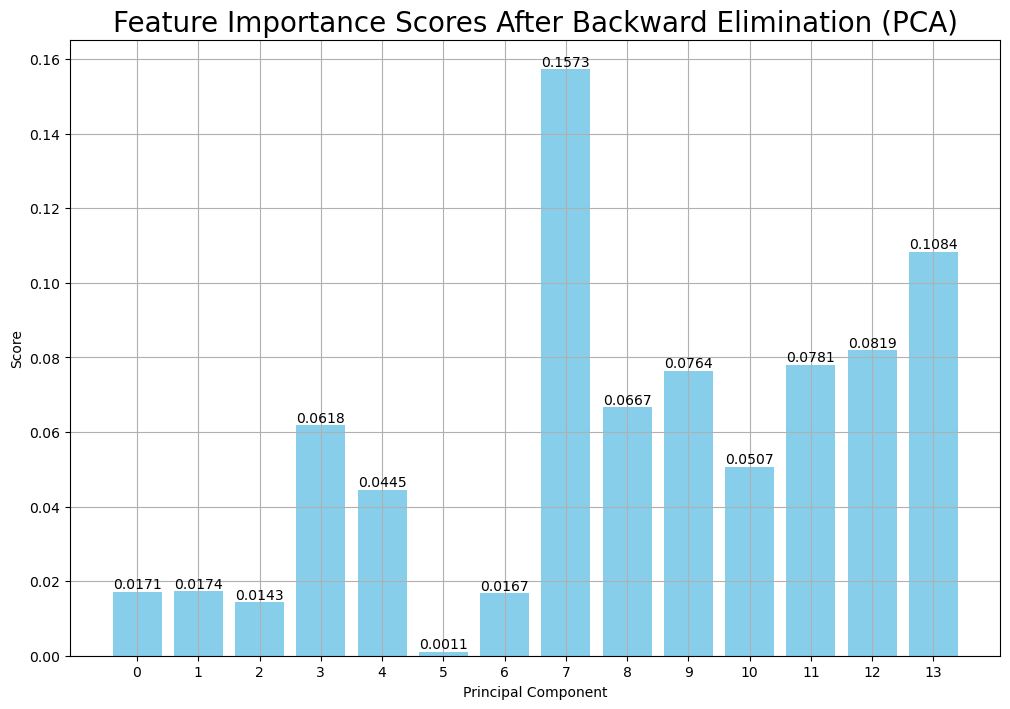

In [12]:
model = LinearRegression()

# Train initial model using all features
model.fit(X_train_pca, y_train)

# Get initial score
initial_score = model.score(X_test_pca, y_test)

# Perform backward elimination
selected_features = list(range(X_train_pca.shape[1]))  # Features are now principal components
feature_scores = np.abs(model.coef_)  # Initial feature scores

# Initialize a list to store features and their scores
features_with_scores = []

while len(selected_features) > 0:
    # Train model using selected features
    model.fit(X_train_pca[:, selected_features], y_train)
    
    # Get score of the model
    score = model.score(X_test_pca[:, selected_features], y_test)
    
    # Find least important feature
    feature_scores = np.abs(model.coef_)
    least_important_index = np.argmin(feature_scores)
    least_important_feature = selected_features[least_important_index]
    
    # Remove least important feature
    selected_features.remove(least_important_feature)
    
    # Store feature and its score
    features_with_scores.append((least_important_feature, feature_scores[least_important_index]))

# Sort features by score in descending order
sorted_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)

# Print features in descending order of score
for feature, score in sorted_features:
    print(f"Principal Component: {feature + 1}, Score: {score}")
    
df_features = pd.DataFrame(sorted_features, columns=['Principal Component', 'Score'])

# Sort the bars by their score
df_features = df_features.sort_values(by='Score', ascending=False)

# Plot the scores
plt.figure(figsize=(12, 8))
bars = plt.bar(df_features['Principal Component'], df_features['Score'], color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Score')
plt.grid()
plt.title('Feature Importance Scores After Backward Elimination (PCA)', fontsize=20)

# Adjust x-axis labels
plt.xticks(np.arange(0, len(df_features)), [f'{x}' for x in range(len(df_features))])

# Add scores above the bars
for bar, score in zip(bars, df_features['Score']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.4f}', va='bottom', ha='center')

plt.savefig("Backwards Elimination.png")
plt.show()


In [12]:
# # backwards elimination did not work so well, trying forward selection

# print("--------------------------------Forwards (terrible)------------------")
# model = LinearRegression()

# # Perform forward selection
# selected_features = []
# selected_features_scores = []

# while len(selected_features) < len(X_train.columns):
#     best_feature = None
#     best_score = -float('inf')
#     for feature in X_train.columns:
#         if feature in selected_features:
#             continue
#         candidate_features = selected_features + [feature]
#         model.fit(X_train[candidate_features], y_train)
#         score = model.score(X_test[candidate_features], y_test)
#         if score > best_score:
#             best_feature = feature
#             best_score = score
#     selected_features.append(best_feature)
#     selected_features_scores.append(best_score)

# min_score = min(selected_features_scores)
# max_score = max(selected_features_scores)

# # Plot the results
# plt.figure(figsize=(12, 8))
# colors = sns.light_palette("navy", len(selected_features))
# bars = plt.barh(range(len(selected_features)), selected_features_scores, color=colors, tick_label=selected_features)
# plt.xlabel('Score')
# plt.ylabel('Features')
# plt.grid()
# plt.title('Feature Selection by Forward Selection')
# plt.gca().invert_yaxis()

# plt.tight_layout()  # Adjust layout
# plt.show()

# Gonna try RFE - PCA

Principal Component: 1, Ranking: 11
Principal Component: 2, Ranking: 10
Principal Component: 3, Ranking: 13
Principal Component: 4, Ranking: 7
Principal Component: 5, Ranking: 9
Principal Component: 6, Ranking: 14
Principal Component: 7, Ranking: 12
Principal Component: 8, Ranking: 1
Principal Component: 9, Ranking: 6
Principal Component: 10, Ranking: 5
Principal Component: 11, Ranking: 8
Principal Component: 12, Ranking: 4
Principal Component: 13, Ranking: 3
Principal Component: 14, Ranking: 2


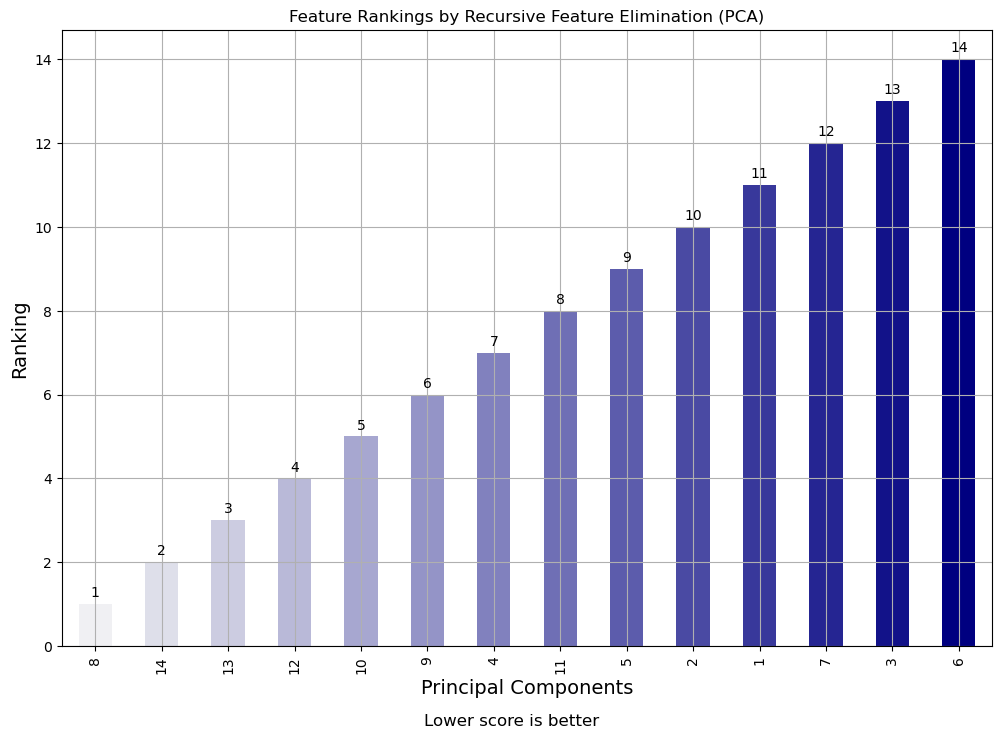

In [17]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train_pca, y_train)  # Use PCA-transformed features

# Get the rankings of the features
feature_ranking = pd.Series(rfe.ranking_, index=range(1, X_train_pca.shape[1] + 1))  # Use indices instead

for component, rank in feature_ranking.items():
    print(f"Principal Component: {component}, Ranking: {rank}")

# Create a color palette that gets progressively darker
colors = sns.light_palette("navy", len(feature_ranking))

# Plot the feature rankings with swapped axes and progressively darker color
plt.figure(figsize=(12, 8))
bars = feature_ranking.sort_values().plot(kind='bar', color=colors)

# Add values on top of the bars
for index, value in enumerate(feature_ranking.sort_values()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Ranking', fontsize=14)
plt.grid()
plt.title('Feature Rankings by Recursive Feature Elimination (PCA)')
txt="Lower score is better"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig("RFE.png")

plt.show()

# UniVariate Selection

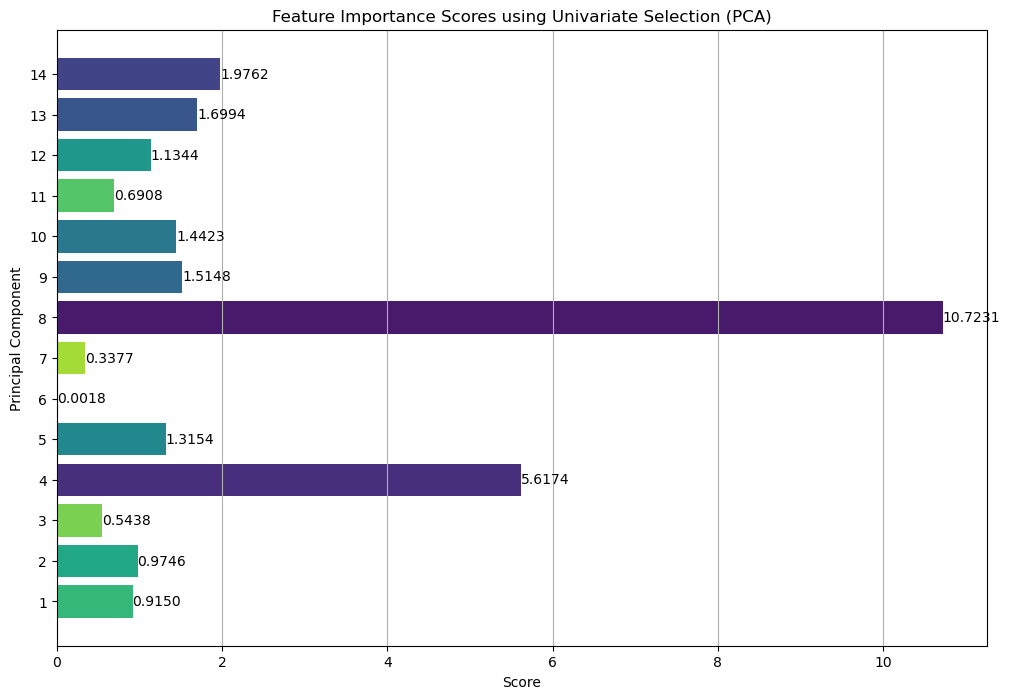

Principal Component: 12, Score: 1.1344
Principal Component: 13, Score: 1.6994
Principal Component: 6, Score: 0.0018
Principal Component: 7, Score: 0.3377
Principal Component: 2, Score: 0.9746
Principal Component: 1, Score: 0.9150
Principal Component: 9, Score: 1.5148
Principal Component: 3, Score: 0.5438
Principal Component: 4, Score: 5.6174
Principal Component: 8, Score: 10.7231
Principal Component: 11, Score: 0.6908
Principal Component: 14, Score: 1.9762
Principal Component: 5, Score: 1.3154
Principal Component: 10, Score: 1.4423


In [19]:
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
selector.fit(X_train_pca, y_train)  # Use PCA-transformed features

sorted_indices = np.argsort(selector.scores_)[::-1]  # Sort indices in descending order
sorted_features = np.arange(1, X_train_pca.shape[1] + 1)[sorted_indices]  # Use PCA indices
sorted_scores = selector.scores_[sorted_indices]

# Plot the feature scores
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(sorted_features))  # Using Viridis color palette
bars = plt.barh(sorted_features, sorted_scores, color=colors)
plt.xlabel('Score')
plt.ylabel('Principal Component')
plt.grid(axis='x')  # Show grid only on the x-axis
plt.title('Feature Importance Scores using Univariate Selection (PCA)')

# Set y-axis ticks to match principal components
plt.yticks(sorted_features)

# Add scores next to the bars
for bar, score, feature in zip(bars, sorted_scores, sorted_features):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', va='center', ha='left')

    
plt.savefig("Univariate.png")
plt.show()

sorted_indices = np.argsort(selector.scores_)[::-1]  # Sort indices in descending order
for feature, score in zip(sorted_features[sorted_indices], sorted_scores[sorted_indices]):
    print(f'Principal Component: {feature}, Score: {score:.4f}')



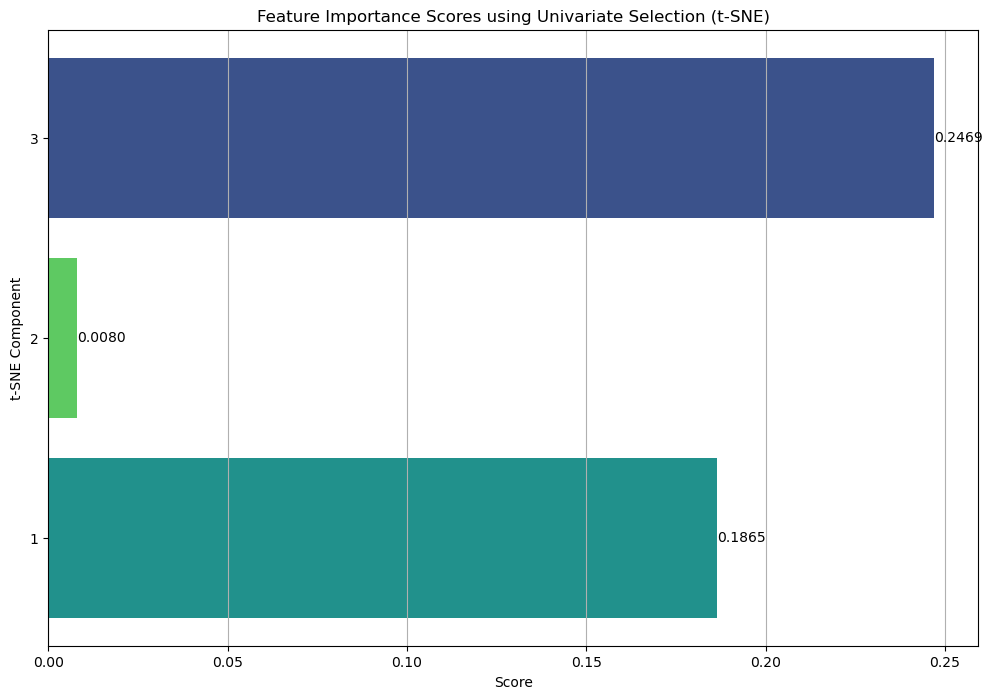

Selected Features:
t-SNE Component: 3
t-SNE Component: 1
t-SNE Component: 2


In [15]:
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Perform Univariate Selection (SelectKBest)
selector = SelectKBest(score_func=f_regression, k=3)  # Select top 5 features
selector.fit(X_train_tsne, y_train)

# Get the selected features and their scores
sorted_indices = np.argsort(selector.scores_)[::-1]  # Sort indices in descending order
sorted_features = np.arange(1, X_train_tsne.shape[1] + 1)[sorted_indices]  # Use t-SNE indices
sorted_scores = selector.scores_[sorted_indices]

# Plot the feature scores
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(sorted_features))  # Using Viridis color palette
bars = plt.barh(sorted_features, sorted_scores, color=colors)
plt.xlabel('Score')
plt.ylabel('t-SNE Component')
plt.grid(axis='x')  # Show grid only on the x-axis
plt.title('Feature Importance Scores using Univariate Selection (t-SNE)')

# Set y-axis ticks to match t-SNE components
plt.yticks(sorted_features)

# Add scores next to the bars
for bar, score, feature in zip(bars, sorted_scores, sorted_features):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', va='center', ha='left')

plt.show()

# Print selected features
print("Selected Features:")
for feature in sorted_features:
    print(f't-SNE Component: {feature}')

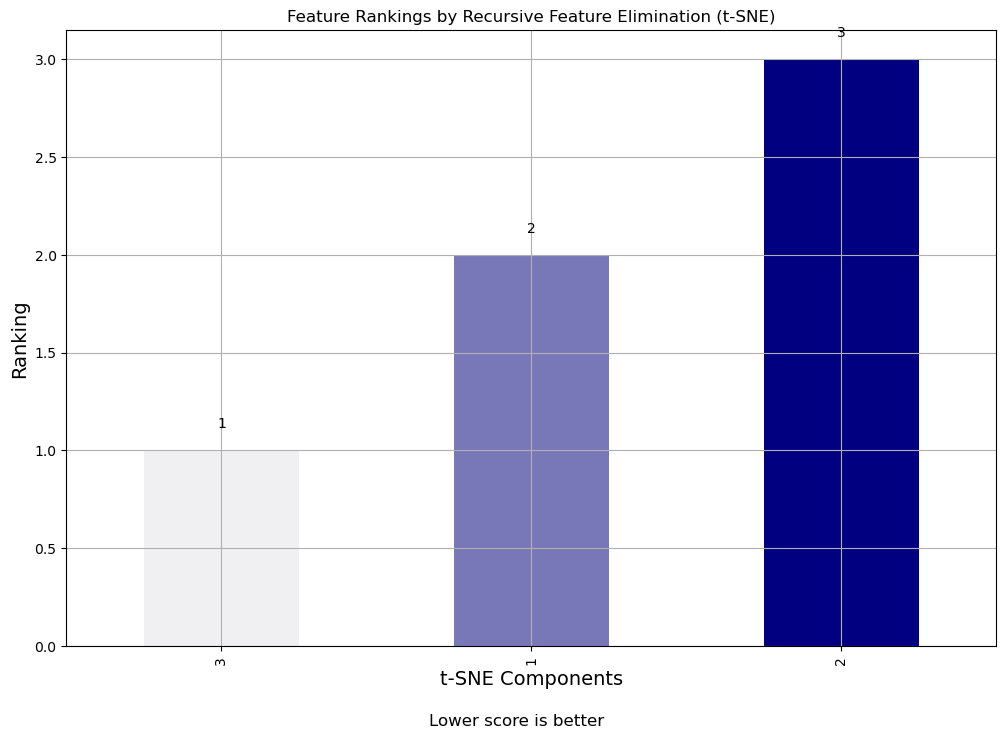

In [16]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train_tsne, y_train)  # Use t-SNE transformed features

# Get the rankings of the features
feature_ranking = pd.Series(rfe.ranking_, index=range(1, X_train_tsne.shape[1] + 1))  # Use indices instead

# Create a color palette that gets progressively darker
colors = sns.light_palette("navy", len(feature_ranking))

# Plot the feature rankings with swapped axes and progressively darker color
plt.figure(figsize=(12, 8))
bars = feature_ranking.sort_values().plot(kind='bar', color=colors)

# Add values on top of the bars
for index, value in enumerate(feature_ranking.sort_values()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('t-SNE Components', fontsize=14)
plt.ylabel('Ranking', fontsize=14)
plt.grid()
plt.title('Feature Rankings by Recursive Feature Elimination (t-SNE)')
txt = "Lower score is better"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


t-SNE Component: 1, Score: 0.0026001520454883575
t-SNE Component: 3, Score: 0.002511020749807358
t-SNE Component: 2, Score: 0.0008273926214314997


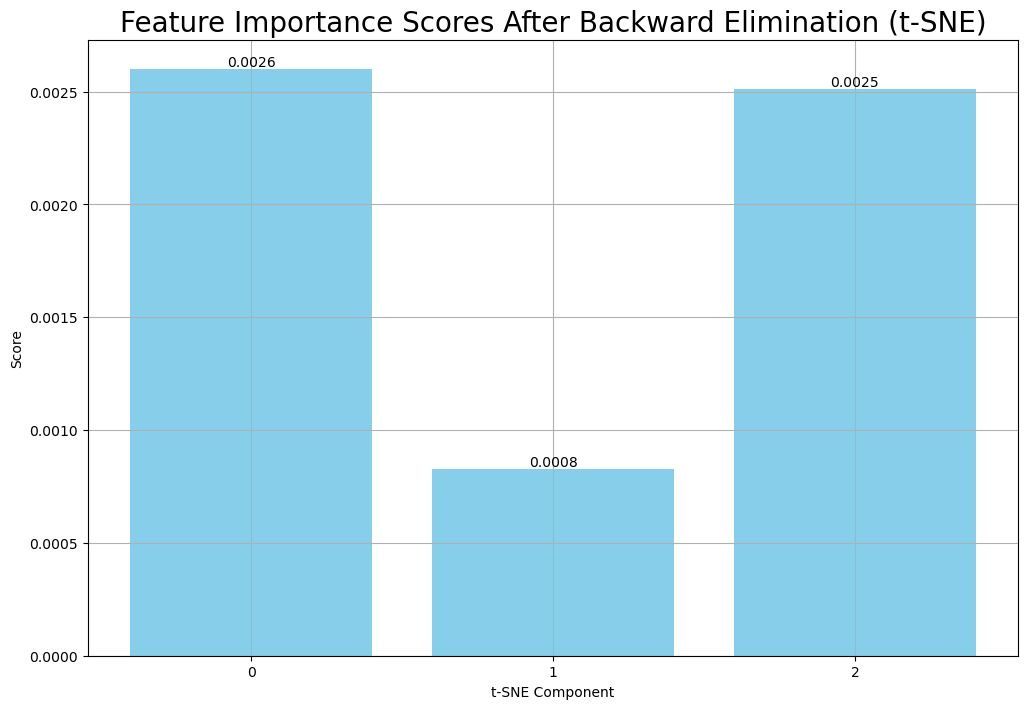

In [17]:
model = LinearRegression()

# Train initial model using all features
model.fit(X_train_tsne, y_train)

# Get initial score
initial_score = model.score(X_test_tsne, y_test)

# Perform backward elimination
selected_features = list(range(X_train_tsne.shape[1]))  # Features are now t-SNE components
feature_scores = np.abs(model.coef_)  # Initial feature scores

# Initialize a list to store features and their scores
features_with_scores = []

while len(selected_features) > 0:
    # Train model using selected features
    model.fit(X_train_tsne[:, selected_features], y_train)
    
    # Get score of the model
    score = model.score(X_test_tsne[:, selected_features], y_test)
    
    # Find least important feature
    feature_scores = np.abs(model.coef_)
    least_important_index = np.argmin(feature_scores)
    least_important_feature = selected_features[least_important_index]
    
    # Remove least important feature
    selected_features.remove(least_important_feature)
    
    # Store feature and its score
    features_with_scores.append((least_important_feature, feature_scores[least_important_index]))

# Sort features by score in descending order
sorted_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)

# Print features in descending order of score
for feature, score in sorted_features:
    print(f"t-SNE Component: {feature + 1}, Score: {score}")
    
df_features = pd.DataFrame(sorted_features, columns=['t-SNE Component', 'Score'])

# Plot the scores
plt.figure(figsize=(12, 8))
bars = plt.bar(df_features['t-SNE Component'], df_features['Score'], color='skyblue')
plt.xlabel('t-SNE Component')
plt.ylabel('Score')
plt.grid()
plt.title('Feature Importance Scores After Backward Elimination (t-SNE)', fontsize=20)  # Increase title font size

# Sort the bars by their score
sorted_bars = [bar for _, bar in sorted(zip(df_features['Score'], bars), key=lambda x: x[0], reverse=True)]

# Adjust x-axis labels
plt.xticks(np.arange(0, len(df_features)), [f'{x}' for x in range(len(df_features))])

# Add scores above the bars
for bar, score in zip(sorted_bars, df_features['Score']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.4f}', va='bottom', ha='center')

plt.show()


a)removed duplicates, searched for nan, empties rows and nulls. Searched for outliers visually first by doing a scatter plot of each variable against the "target" variable and then using KNN. Afterwards, a standard standardization was applied so that the variable range would be between 0-1 as it is recommended when using PCA

b)I selected 3 different feature engineering methods.

c) Plots above with the scores. 

# 2 Exercise

In [21]:
#Already have the data cleaned, lets just drop the target column
clean_df
cleanDF2Exercise = clean_df.drop(['target'], axis=1)
cleanDF2Exercise


x1        x2        x3        x4        x5        x6        x7  \
0   -0.008763  0.001770  0.010446 -0.007264  0.004724  0.008800 -0.017919   
1   -0.009820  0.009675 -0.035837 -0.020312  0.006930  0.036925 -0.035215   
2   -0.008362  0.032523 -0.017077 -0.005372 -0.017278  0.001761 -0.009824   
3    0.001112  0.010383  0.021889  0.021950  0.007332 -0.011565  0.007420   
4    0.011250 -0.004752  0.004993  0.016260 -0.015250 -0.013459  0.040848   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.008846  0.004407  0.021867  0.014508 -0.012009 -0.025416  0.014061   
995 -0.014778 -0.004468 -0.015341  0.004757  0.011841  0.002007  0.013082   
996 -0.014106 -0.025678 -0.015926 -0.014217  0.023251  0.013802 -0.014831   
998  0.000626  0.017429 -0.000916  0.043471 -0.011593  0.004590  0.026052   
999 -0.002601 -0.018135  0.014241 -0.024084  0.020633 -0.004302 -0.031420   

           x8        x9       x10       x11       x12       x13       x14  \
0   -0.016258 -0.008299 -0.014621 -0.012198  0.006303 -0.015848  0.009249   
1   -0.008280 -0.035210  0.004720  0.021993  0.008890  0.021302  0.011256   
2    0.006557 -0.007443 -0.001127  0.016661 -0.004936 -0.001141  0.008117   
3   -0.020697  0.014531 -0.000314  0.006177  0.007837 -0.010262 -0.005631   
4    0.009176  0.021054  0.008277 -0.013034 -0.024464 -0.003579 -0.014969   
..        ...       ...       ...       ...       ...       ...       ...   
994 -0.008860  0.021264  0.011161 -0.005507  0.000353 -0.018665 -0.002240   
995 -0.009240  0.008017 -0.002254 -0.005199 -0.003915 -0.006777  0.018189   
996  0.011226 -0.012182  0.003630  0.000277  0.015589  0.006167 -0.002880   
998  0.007109  0.022681  0.015859  0.017313 -0.009597 -0.000519 -0.022338   
999  0.007858 -0.023295 -0.001743 -0.006341  0.019954  0.004218  0.014068   

          x15       x16       x17       x18       x19       x20  
0   -0.007695  0.006360  0.001814  0.018827 -0.002751  0.011877  
1    0.012020  0.023055 -0.036148 -0.008922  0.003422  0.014325  
2    0.000905  0.002428  0.005257  0.012173  0.004801  0.003105  
3   -0.018528  0.006506  0.009414 -0.013356  0.006852  0.007704  
4   -0.013871  0.002806  0.024182 -0.003080 -0.001399  0.014814  
..        ...       ...       ...       ...       ...       ...  
994  0.002415 -0.012045  0.024835  0.005323  0.000577 -0.008481  
995 -0.000968 -0.008840 -0.002759 -0.009887 -0.006854 -0.005794  
996  0.010108  0.006171 -0.003957  0.006225 -0.009715 -0.019390  
998 -0.034572  0.005036  0.017529 -0.014505  0.015133  0.011968  
999  0.017379 -0.017244  0.001289  0.006566 -0.016357 -0.003295  

[944 rows x 20 columns]

In [22]:
#using stadard normalization
scaler = StandardScaler()

# Perform standard normalization on cleanDF2Exercise
cleanDF2Exercise_standardized = scaler.fit_transform(cleanDF2Exercise)

# Convert the standardized array back to a DataFrame
cleanDF2Exercise_standardized = pd.DataFrame(cleanDF2Exercise_standardized, columns=cleanDF2Exercise.columns)

cleanDF2Exercise_standardized

x1        x2        x3        x4        x5        x6        x7  \
0   -0.921262  0.123982  0.709894 -0.430447  0.364556  0.620163 -1.056809   
1   -1.032615  0.594156 -2.435009 -1.235701  0.544667  2.571248 -2.082433   
2   -0.879061  1.953260 -1.160275 -0.313653 -1.431732  0.131842 -0.576819   
3    0.118236  0.636305  1.487432  1.372534  0.577471 -0.792622  0.445711   
4    1.185416 -0.263984  0.339402  1.021327 -1.266214 -0.924020  2.427907   
..        ...       ...       ...       ...       ...       ...       ...   
939  0.932398  0.280828  1.485976  0.913242 -1.001540 -1.753497  0.839522   
940 -1.554542 -0.247079 -1.042274  0.311421  0.945533  0.148949  0.781455   
941 -1.483716 -1.508782 -1.082039 -0.859561  1.877067  0.967160 -0.873674   
942  0.067044  1.055407 -0.062133  2.700688 -0.967613  0.328094  1.550569   
943 -0.272671 -1.060055  0.967805 -1.468473  1.663349 -0.288772 -1.857382   

           x8        x9       x10       x11       x12       x13       x14  \
0   -1.526267 -0.540439 -1.533109 -0.946490  0.622603 -1.423411  0.613121   
1   -0.767096 -2.170107  0.482917  1.628506  0.869157  1.835256  0.752930   
2    0.644847 -0.488569 -0.126538  1.226917 -0.448821 -0.133439  0.534282   
3   -1.948707  0.842148 -0.041812  0.437382  0.768810 -0.933441 -0.423301   
4    0.894071  1.237140  0.853726 -1.009450 -2.310487 -0.347243 -1.073666   
..        ...       ...       ...       ...       ...       ...       ...   
939 -0.822248  1.249874  1.154331 -0.442575  0.055304 -1.670565 -0.187102   
940 -0.858422  0.447633 -0.243997 -0.419402 -0.351501 -0.627746  1.235846   
941  1.089212 -0.775607  0.369258 -0.007014  1.507828  0.507668 -0.231683   
942  0.697404  1.335697  1.643984  1.276073 -0.893135 -0.078836 -1.586903   
943  0.768686 -1.448540 -0.190828 -0.505424  1.923923  0.336722  0.948795   

          x15       x16       x17       x18       x19       x20  
0   -0.603820  0.741134  0.089599  1.942707 -0.255318  0.817518  
1    0.855642  2.806609 -2.377406 -0.899381  0.418572  0.987504  
2    0.032799  0.254600  0.313320  1.261194  0.569089  0.208430  
3   -1.405812  0.759204  0.583477 -1.353526  0.792992  0.527764  
4   -1.061047  0.301367  1.543149 -0.301043 -0.107761  1.021449  
..        ...       ...       ...       ...       ...       ...  
939  0.144587 -1.536033  1.585589  0.559608  0.108020 -0.596120  
940 -0.105820 -1.139440 -0.207573 -0.998264 -0.703254 -0.409536  
941  0.714092  0.717708 -0.285461  0.651953 -1.015581 -1.353594  
942 -2.593510  0.577284  1.110798 -1.471220  1.697064  0.823889  
943  1.252393 -2.179197  0.055461  0.686849 -1.740698 -0.235967  

[944 rows x 20 columns]

### a) i did the pre processing steps of removing duplicates, nulls and empties as well as checking for outliers visually and then removing them using KNN. Then a standard normalization was applied to make sure the values would have a mean of 0 and standard deviation of 1 as it is recomended for PCA.

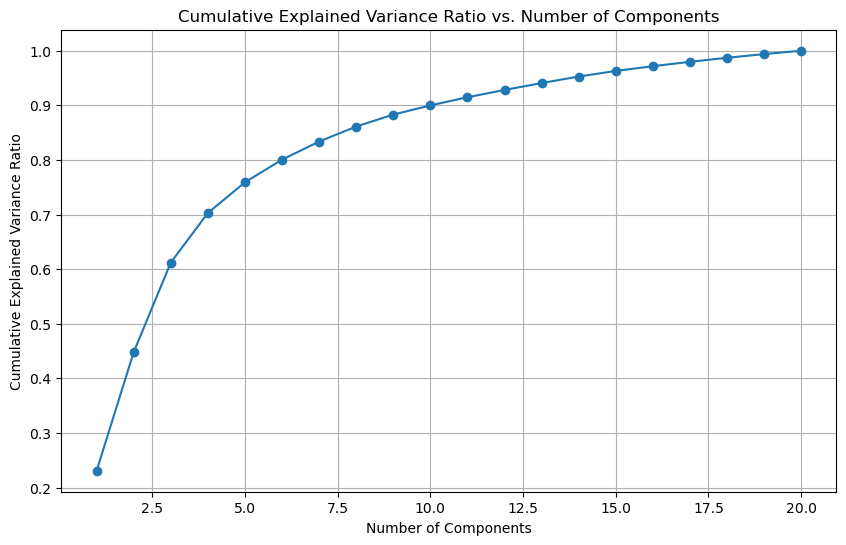

In [23]:
pca = PCA()
X_pca = pca.fit_transform(cleanDF2Exercise_standardized)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.savefig("Cumulative Explained Variace.png")
plt.show()

### b) The plot shows the cumulative variance of the depending on the number of components, meaning that for example, 10 components explain 0.9 of the data. Based on thist plot,  we should select a percentage that let's us have a still high number of variance so our date has enough representation. the curve inflection point is a good choice. Based on this, i will select above the inflection point which is roughly at 0.8, so 0.9 should give us a good result 

(
The number of dimensions you should select depends on the desired level of explained variance and the trade-off between dimensionality reduction and information retention. In general, you may aim to select a number of dimensions that capture a substantial portion of the total variance in the data, typically around 70-95%. You can determine this by examining the cumulative explained variance ratio plot and selecting the number of components where the curve starts to level off or reaches an inflection point. )

(The cumulative explained variance ratio indicates the proportion of the total variance in the original data that is explained by each principal component (or dimension) and the cumulative contribution of all the components considered together.

For example, if the cumulative explained variance ratio for three components is 0.8, it means that these three components collectively explain 80% of the total variance in the dataset. This metric helps in understanding how much information is retained by reducing the dimensionality of the data.)


In [29]:
num_selected_dimensions = 10

feature_loadings = pca.components_[:num_selected_dimensions]

# Create a DataFrame to display the feature loadings
feature_loadings_df = pd.DataFrame(feature_loadings, columns=cleanDF2Exercise.columns)

# Print the feature loadings
print("Resposta c)")
print("Feature Loadings for the Selected Dimensions:")
print(feature_loadings_df)


Resposta c)
Feature Loadings for the Selected Dimensions:
         x1        x2        x3        x4        x5        x6        x7  \
0  0.135251  0.183802  0.102725  0.373412 -0.365316 -0.103026  0.395288   
1 -0.037964  0.305021 -0.362297 -0.015579 -0.139618  0.399776 -0.099708   
2  0.099416 -0.265439  0.055645 -0.194843 -0.069072  0.101588  0.061547   
3  0.574803  0.192108  0.175159 -0.212490 -0.169443 -0.014210 -0.224104   
4 -0.233390  0.080622  0.383256  0.082218  0.027600 -0.212664 -0.076000   
5  0.236337 -0.062454  0.120185  0.026782  0.105502  0.103379 -0.091843   
6  0.034896  0.112527 -0.110113  0.068890 -0.069392  0.093953  0.039427   
7  0.014985 -0.074089  0.027722 -0.112309  0.073303  0.029856 -0.072404   
8  0.371299  0.004408  0.007030 -0.019311 -0.318914 -0.098501 -0.053005   
9 -0.022056  0.163143  0.183078  0.173535  0.393778 -0.302345 -0.005817   

         x8        x9       x10       x11       x12       x13       x14  \
0  0.087603  0.192560  0.177535  0.061557

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Example data (replace with your actual data)
cleanDF2Exercise = pd.DataFrame(np.random.randn(100, 20), columns=[f'x{i}' for i in range(1, 21)])

# Perform PCA
num_selected_dimensions = 10
pca = PCA()
pca.fit(cleanDF2Exercise)

feature_loadings = pca.components_[:num_selected_dimensions]

# Create a DataFrame to display the feature loadings
feature_loadings_df = pd.DataFrame(feature_loadings, columns=cleanDF2Exercise.columns)

# Round values to 3 decimal points
feature_loadings_df = feature_loadings_df.round(3)

# Print the feature loadings with formatted output
print("Resposta c)")
print("Feature Loadings for the Selected Dimensions:")
with pd.option_context('display.max_columns', None):  # Ensure all columns are displayed
    print(feature_loadings_df)

# Export to CSV (optional)
feature_loadings_df.to_csv('feature_loadings.csv', index=False)


Resposta c)
Feature Loadings for the Selected Dimensions:
      x1     x2     x3     x4     x5     x6     x7     x8     x9    x10  \
0  0.091 -0.069 -0.036  0.387  0.066  0.164  0.229  0.168  0.026 -0.037   
1  0.130 -0.212  0.444 -0.347 -0.047  0.035  0.244 -0.184  0.192  0.233   
2 -0.065  0.119  0.241  0.066  0.187 -0.414 -0.093  0.068  0.506 -0.097   
3 -0.220 -0.003 -0.012  0.108  0.043 -0.011 -0.186 -0.170  0.276 -0.567   
4 -0.180 -0.073 -0.075  0.190 -0.021  0.057  0.092 -0.123  0.193 -0.026   
5  0.121 -0.249 -0.316 -0.265 -0.137  0.415 -0.287  0.105  0.378  0.239   
6 -0.032 -0.132  0.110 -0.059  0.167  0.179  0.295  0.492  0.100 -0.291   
7 -0.012  0.348  0.252 -0.064  0.082 -0.070 -0.224  0.581  0.140  0.325   
8  0.296 -0.573 -0.166  0.144  0.229 -0.255 -0.068  0.307  0.031 -0.093   
9 -0.301  0.164 -0.147  0.017 -0.020 -0.122  0.274  0.206  0.040  0.083   

     x11    x12    x13    x14    x15    x16    x17    x18    x19    x20  
0  0.017 -0.402 -0.317 -0.487  0.129 -0.01

In [22]:
print("Resposta d) sera que e mesmo so ir coluna a coluna e fazer observacoes?")

Resposta d) sera que e mesmo so ir coluna a coluna e fazer observacoes?


# Exercisio 3

In [37]:
classDF = pd.read_csv("class.csv")
classDF

x1        x2        x3        x4        x5        x6        x7  \
0   -1.983634  0.474730  2.019827 -0.617452 -0.802293  0.339964  0.735864   
1    1.079524 -1.034886 -0.473469 -2.280912 -1.059979 -0.850886  1.025015   
2   -0.913669 -0.892576 -0.155700  0.784545 -0.533193  0.163437 -0.199170   
3   -0.295003  0.663062 -0.164975  0.587393  2.992848 -0.681740 -1.943443   
4   -0.274273  1.142317  1.073605  1.788866 -1.178856  0.085250 -1.103695   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.389681 -1.022897  0.806700  1.186461 -2.391979 -0.781504 -1.188535   
996 -0.912508 -0.876190  1.262706  0.355026 -2.262233  0.620149 -0.024833   
997  0.968120  1.058220  1.532041  0.509046  4.235768 -0.433564  0.537433   
998 -0.399326 -0.956123  0.869520 -0.115653 -2.843925 -0.487001 -1.596660   
999  0.983792 -2.363287  1.244045  0.321689 -1.907143 -1.306608 -0.271511   

           x8        x9       x10  ...       x12       x13       x14  \
0   -0.802293  0.186698 -1.432277  ... -1.058249 -1.146929  0.149560   
1   -1.059979  0.015568 -0.792415  ... -1.631871 -1.205089 -1.978868   
2   -0.533193 -1.075690 -1.567047  ... -0.680518 -1.299146  2.335278   
3    2.992848 -0.746436 -0.952454  ... -0.257389 -1.225183  1.181001   
4   -1.178856 -1.586528  0.371459  ...  0.231058  0.781518 -1.565969   
..        ...       ...       ...  ...       ...       ...       ...   
995 -2.391979 -1.891424 -0.022086  ...  1.896889  1.061087 -0.638412   
996 -2.262233  1.274977 -0.486976  ...  1.136471 -0.829109  0.197749   
997  4.235768  0.901270  0.772230  ...  0.652228 -0.547821 -0.411459   
998 -2.843925  0.338929  0.037415  ...  1.279353  0.364829 -0.117104   
999 -1.907143  0.914908  0.562289  ...  1.182240  0.474383 -1.138855   

          x15       x16       x17       x18       x19       x20  target  
0    0.571252 -1.093624 -2.870037  0.051134  0.423063  1.686740       1  
1    0.691829  2.827505  3.425047  0.829292 -0.616537  1.736490       0  
2   -0.135948 -1.800129 -0.669361  0.791075 -0.188635  1.950686       1  
3   -0.097485  0.909636  1.665434 -0.445185 -0.125576 -2.295889       1  
4   -0.323882 -1.754369 -3.775475 -0.178912  0.507650  0.048963       1  
..        ...       ...       ...       ...       ...       ...     ...  
995  0.687011  1.051448 -0.537055  0.124042 -1.030406  0.677304       0  
996  0.407957  0.452091 -1.215743 -3.582063  0.260823  1.354486       0  
997 -1.885658  0.501695  0.671746  0.622627  0.140075 -1.514937       1  
998  1.219726 -1.896500 -3.928295  0.303888 -0.420246 -0.335224       1  
999  0.027372 -1.557218 -2.109896  0.310976  0.479828  1.305316       1  

[1000 rows x 21 columns]

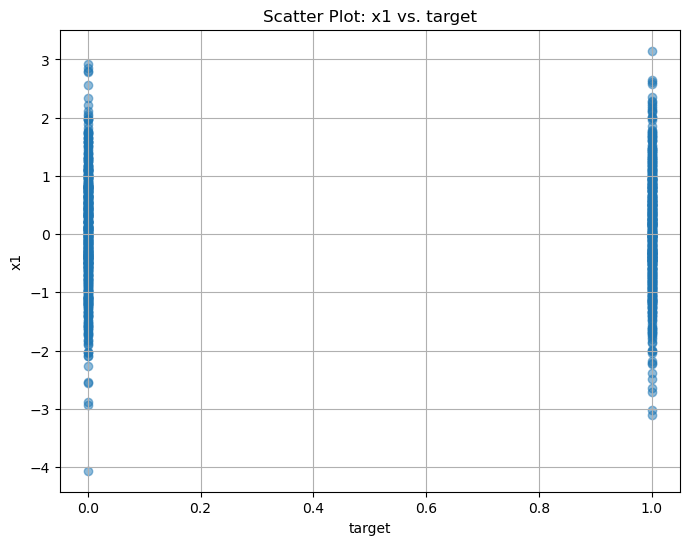

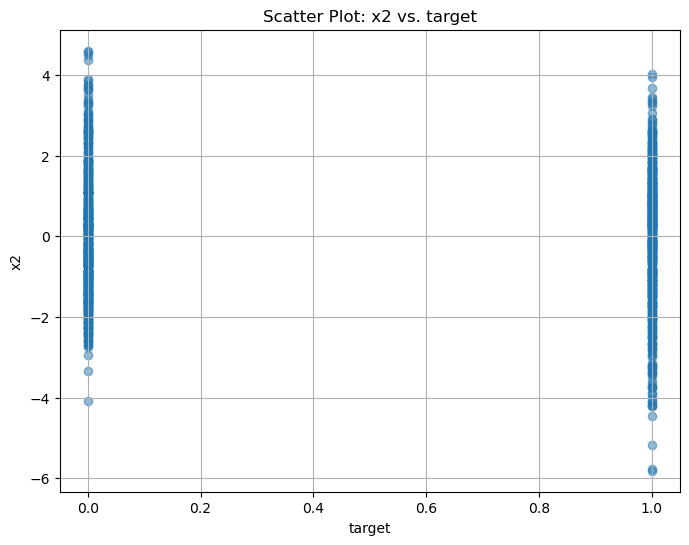

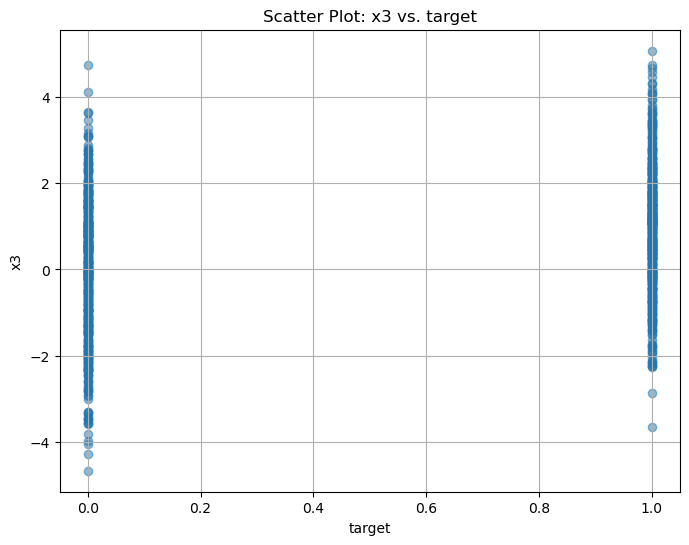

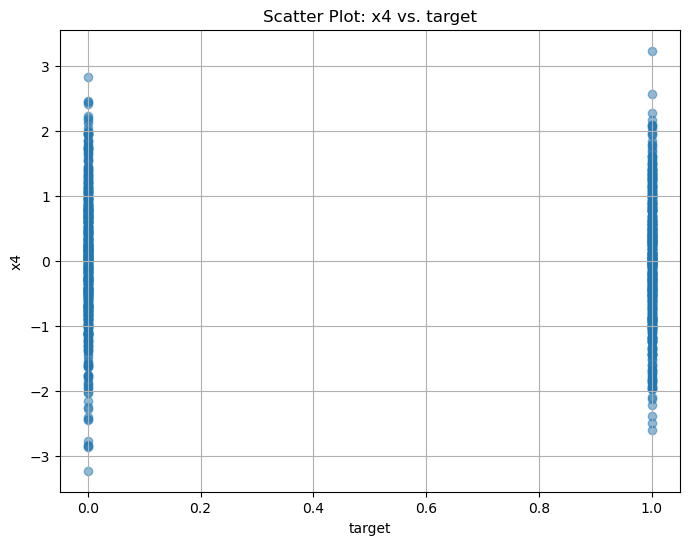

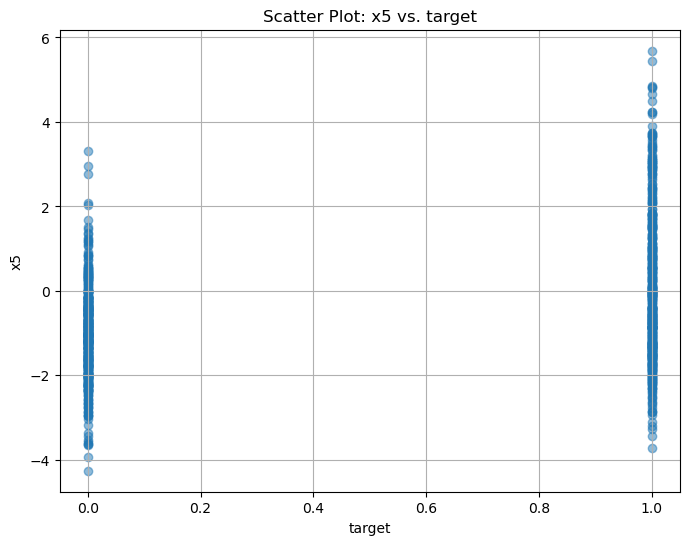

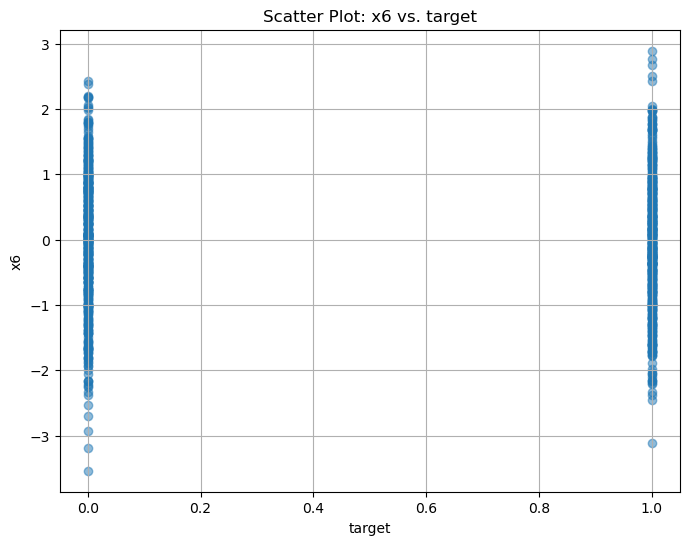

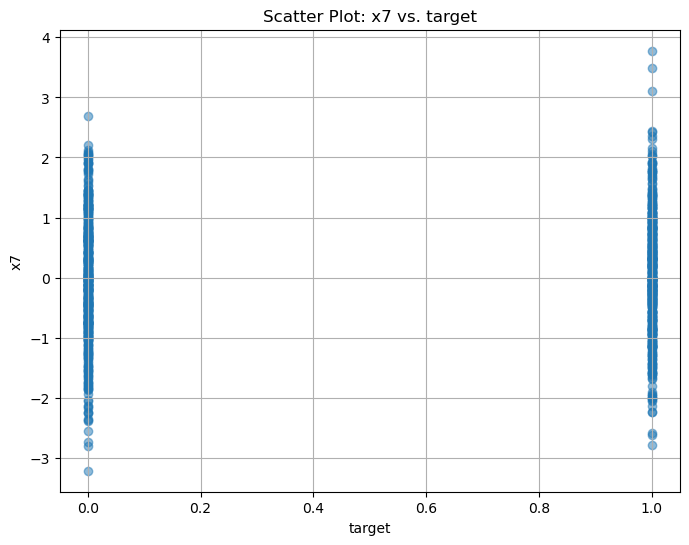

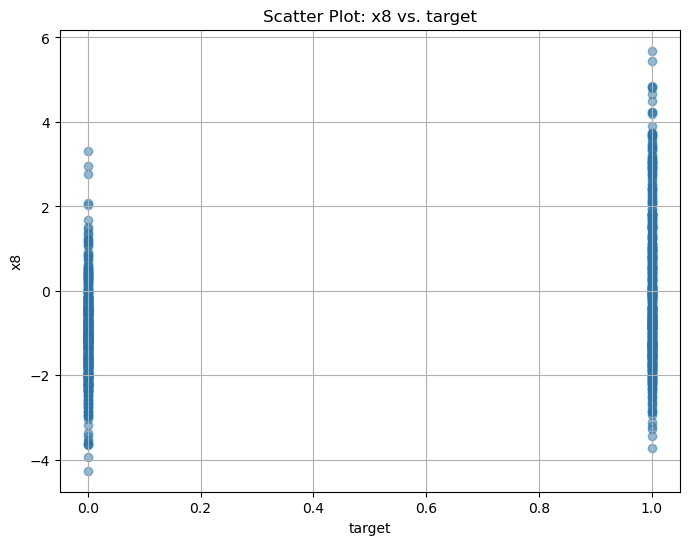

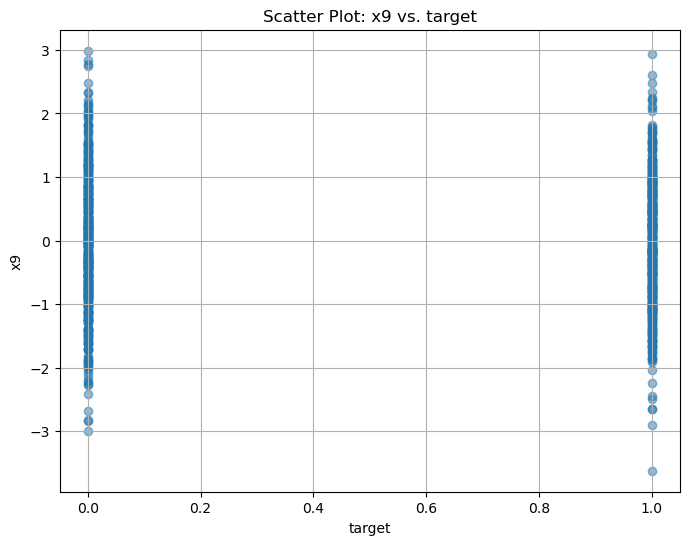

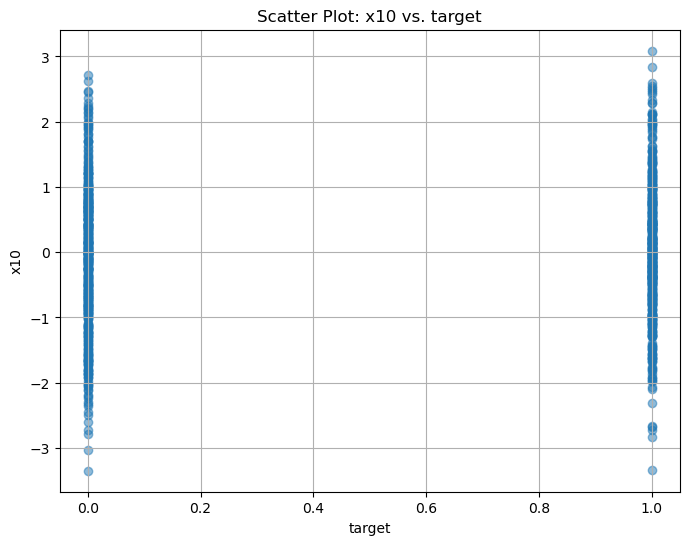

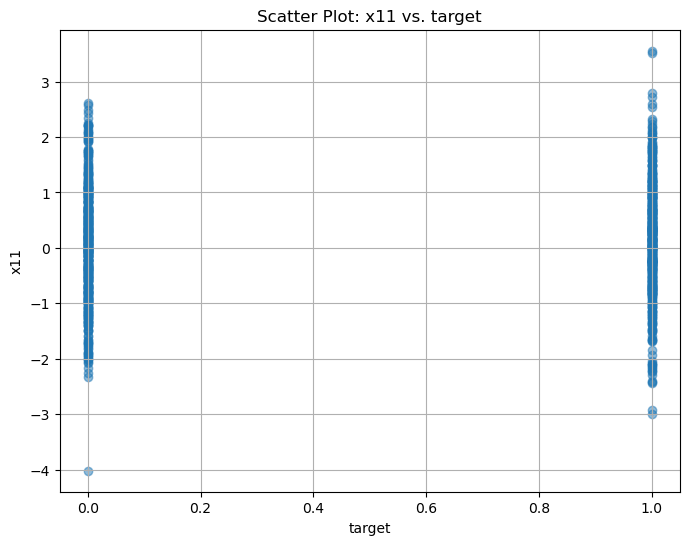

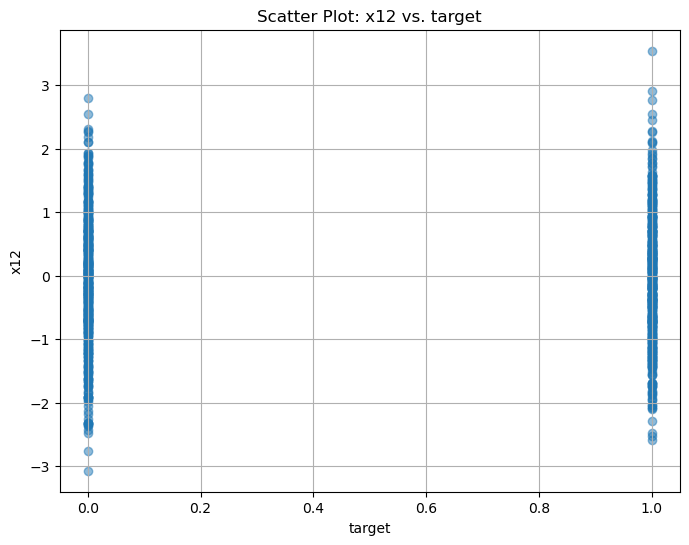

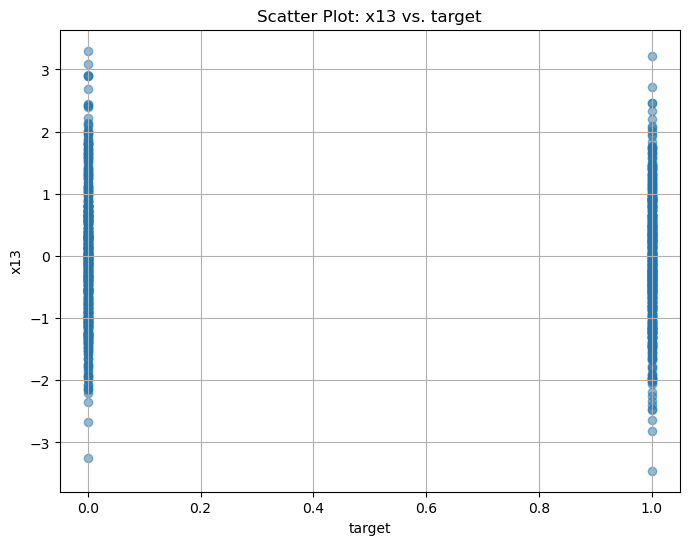

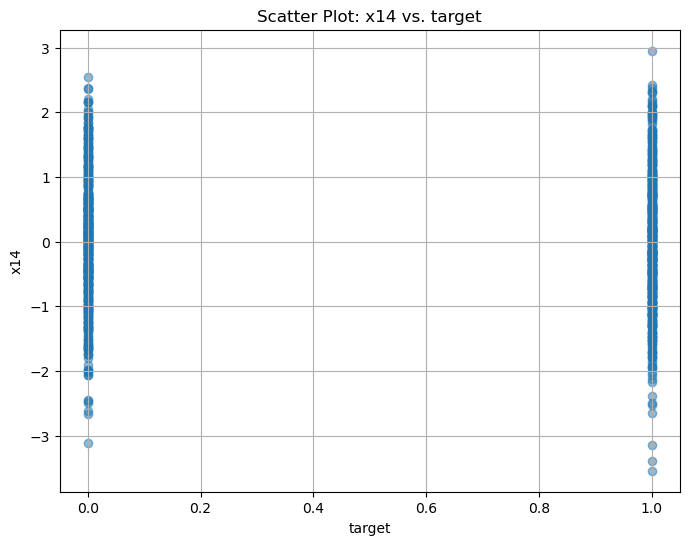

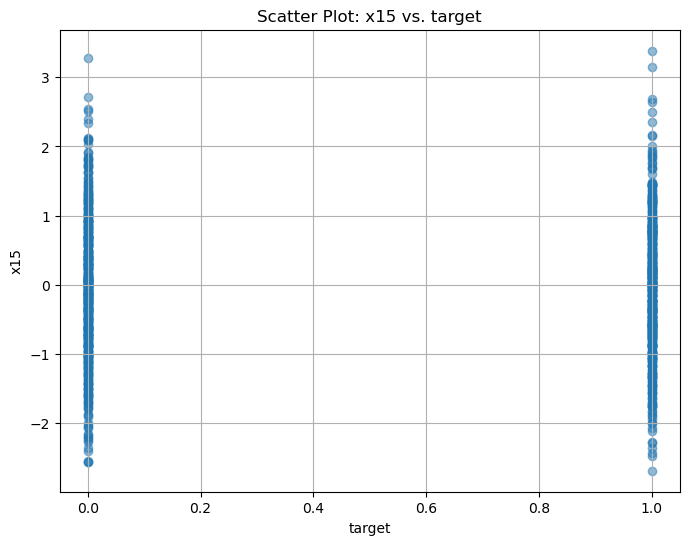

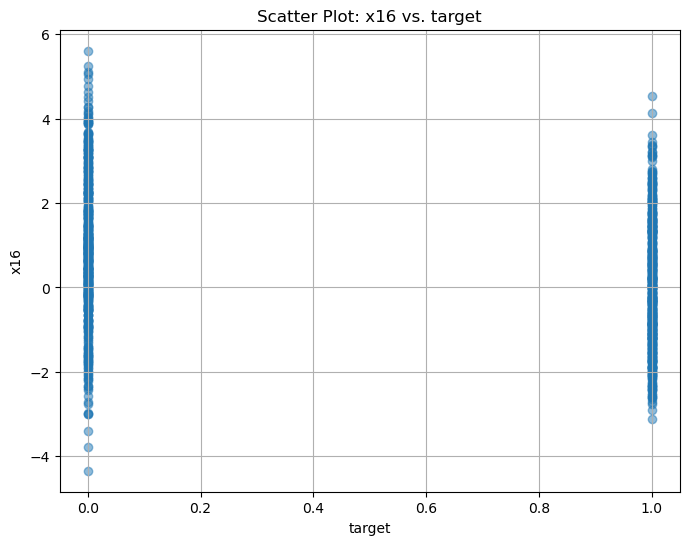

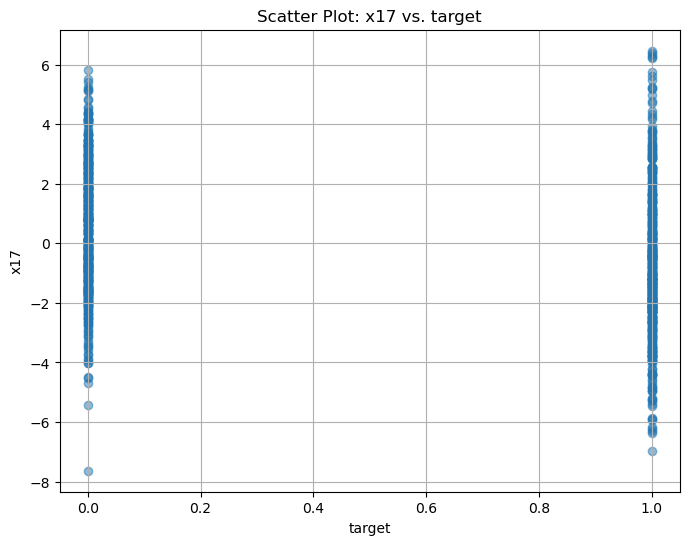

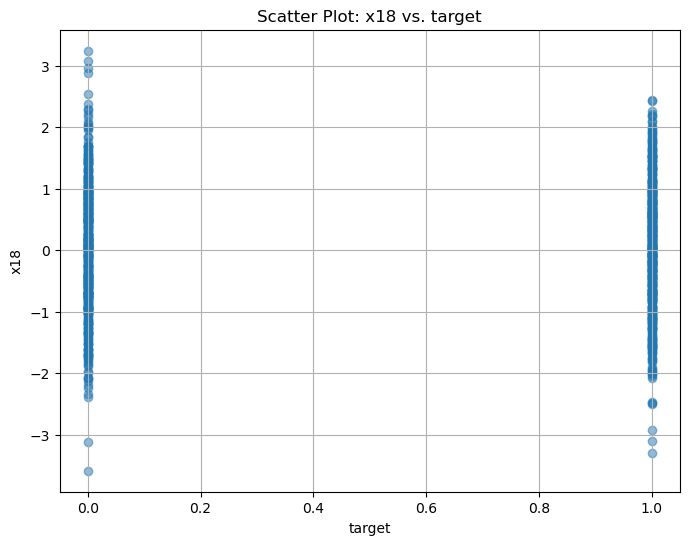

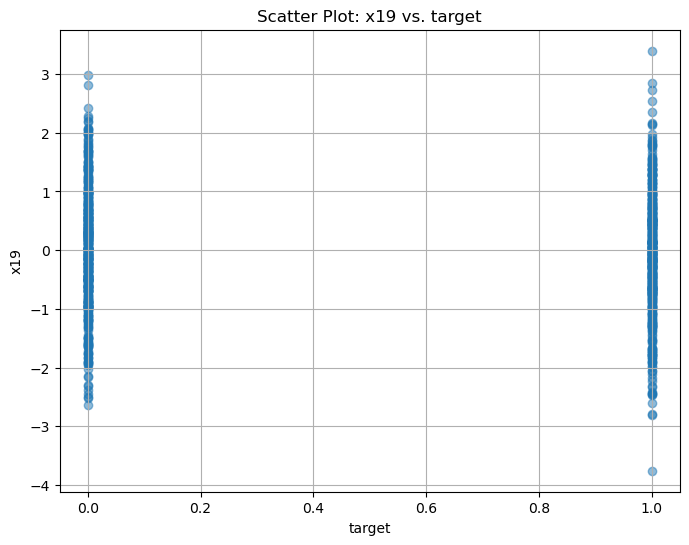

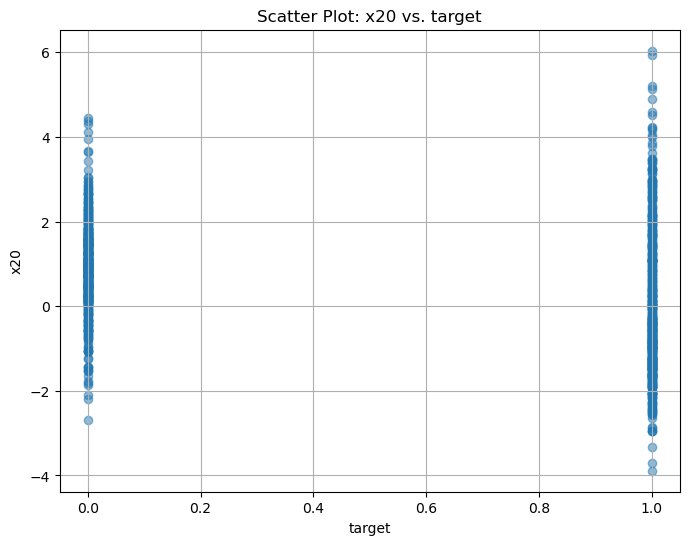

Scatter plot values are around the 0 and the 1 


In [38]:
classDF.isnull().sum()

#check for nan
classDF.isna().sum()
# no nulls, no nan

columns = classDF.columns

#lets go through each column and plot them against our target column
for column in columns:
    if column != 'target':  # Skip plotting the "target" column against itself
        plt.figure(figsize=(8, 6))
        plt.scatter(classDF['target'], classDF[column], alpha=0.5)
        plt.title(f'Scatter Plot: {column} vs. target')
        plt.xlabel('target')
        plt.ylabel(column)
        plt.grid(True)
#         plt.show()
plt.show()
print("Scatter plot values are around the 0 and the 1 ")

# Standartising the data and applying PCA to reduce the number of variables

In [39]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cleanDF2Exercise)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(normalized_data)
print(f"Number of features selected: {X_pca.shape[1]}")

#a) as always checking the data for nulls, nan and empties is the first step,
#followed by visually checking the data with scatter plots for outliers and 
#then applying knn. After this is done, i procceded with standardtisation 
#so the mean is 0 and the standard deviation 1, as that makes PCA more accurate
#

Number of features selected: 18


# Going with random Forest

In [40]:
y = classDF['target']
X = classDF.drop('target', axis=1)  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
print("replace with f1")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
print("F1 Score:", f1)

#b)Random forest was chose as the classifier algorithim because it is  highly accurate
# and captures linear and non-linear relationships 
#it's also less prone to overfitting, and since the dataset is not large, it's not computationally expensive.
#a decision tree algorithim was also briefly chosen but had a lower accuracy of 0.845


replace with f1
Accuracy: 0.895
F1 Score: 0.8948


# c) I chosed Repeated k fold cross validation (k=5), which works by repeatidly spliting the data into test/training data, training the model and evaluating it's performance on it.

In [43]:
n_splits = 5  # Number of folds
n_repeats = 3  # Number of repeats
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Perform repeated cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=rskf)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Mean accuracy: 0.9033
Standard deviation: 0.0176


# D) Using manual Grid searcht with a predetermined set of values

In [44]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(rf_classifier, param_grid, cv=rskf, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\Vasco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vasco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vasco\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Vasco\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Vasco\anaconda3\Lib\site-packag

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


# D) trying it with a Bayesing approach

In [45]:
# Define the parameter search space
param_space = {
    'n_estimators': (50, 200),
    'max_depth': (1, 20)
}

# Initialize BayesSearchCV with the classifier and parameter space
bayes_search = BayesSearchCV(rf_classifier, param_space, cv=rskf, scoring='f1', n_jobs=-1)

# Fit the Bayes search to the data
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\Vasco\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 200] before, using random point [12, 130]
  warnings.warn(
C:\Users\Vasco\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 200] before, using random point [4, 139]
  warnings.warn(
C:\Users\Vasco\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 200] before, using random point [13, 57]
  warnings.warn(
C:\Users\Vasco\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 200] before, using random point [17, 105]
  warnings.warn(
C:\Users\Vasco\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 200] before, using random point [9, 65]
  warnings.warn(
C:\Users\Vasco\anaconda3

Best Hyperparameters: OrderedDict([('max_depth', 13), ('n_estimators', 200)])


# E) give your results as a table or text

In [48]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}

# Perform repeated cross-validation with multiple metrics
cv_results = cross_validate(rf_classifier, X, y, cv=rskf, scoring=scoring)

# Print the mean of each metric
print(f"Mean accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Mean precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1 score: {cv_results['test_f1'].mean():.4f}")
print(f"Mean ROC-AUC score: {cv_results['test_roc_auc'].mean():.4f}")

Mean accuracy: 0.9033
Mean precision: 0.9053
Mean recall: 0.9033
Mean F1 score: 0.9032
Mean ROC-AUC score: 0.9034


# Exercise 4

In [8]:
clusteringDF = pd.read_csv("clustering.csv")
clusteringDF

x1        x2        x3        x4        x5        x6        x7  \
0    4.930069 -3.016987 -5.425873 -0.384758  3.020255  2.438047 -3.528205   
1    2.285850  0.177072  3.298182  3.338347  1.138889  3.422157 -4.711072   
2    1.366753  0.130354  1.525309 -0.187831  0.511112 -1.371871 -1.515285   
3    1.521432  0.220828  1.141213  1.658479  1.881842 -0.476117 -0.556274   
4    1.107895  2.125464  0.155440 -3.066494 -0.663519 -1.611659 -0.179293   
..        ...       ...       ...       ...       ...       ...       ...   
995  3.748737  2.189371  2.255518  1.425617 -0.231480  0.812456 -3.286160   
996 -0.288896  1.752135 -0.214375  1.425152  2.269711  0.404482  1.260675   
997 -1.751964 -2.494973 -5.104721  2.663973 -3.928586  2.559827 -3.892871   
998  1.045868 -0.246030 -1.707883 -1.657180  0.410312 -3.591277 -1.856727   
999  0.467581  2.204773  0.188055 -0.799278  2.857055  0.156158 -1.240549   

           x8        x9       x10  
0   -0.045829  0.827461  0.985415  
1    0.512145  0.700653  0.137692  
2   -1.498143  1.572469 -0.500895  
3   -0.722747 -0.356689  2.370444  
4    0.401731  0.711610 -3.082435  
..        ...       ...       ...  
995 -0.995078  1.084744  0.790638  
996  0.174501 -0.740154 -0.097655  
997  0.851166 -0.324461 -1.010422  
998 -0.662896  0.226524 -2.455802  
999  0.993214 -1.761834  0.887719  

[1000 rows x 10 columns]

In [10]:
clusteringDF.isnull().sum() # no nulls

clusteringDF.isna().sum() #no nan

clusteringDF.isnull().sum().sum() #no empties


0

### Only 1 outlier removed lmao

In [11]:
#Outlier detection and removal
#visualy there does not seem be here outliers. gotta use a outlier detection method, i will go with knn

k = 10 # number of neighbors
t = 2 #threshold sensitivity

#setting up the model
nbrs = NearestNeighbors(n_neighbors = k)
nbrs.fit(clusteringDF)

#do the actual distance calculation
distances, indexes = nbrs.kneighbors(clusteringDF)

#view the distances to the k nearest neighbours. optional
# plt.figure(figsize=(15, 7))
# plt.plot(distances.mean(axis =1))

#average distance
avg_distances = distances.mean(axis=1)

#our threshold is twice that distance
threshold = t * avg_distances.mean()

# lets create a dataframe of just outliers
outliers_indices = clusteringDF.index[avg_distances > threshold]

# # Print the outliers
# print("Potential outliers detected:")
# print(featuresDF.loc[outliers_indices])

#now we simply drop those rows that have outliers, from our main dataframe
clusteringDFClean = clusteringDF.drop(outliers_indices)
clusteringDFClean

x1        x2        x3        x4        x5        x6        x7  \
0    4.930069 -3.016987 -5.425873 -0.384758  3.020255  2.438047 -3.528205   
1    2.285850  0.177072  3.298182  3.338347  1.138889  3.422157 -4.711072   
2    1.366753  0.130354  1.525309 -0.187831  0.511112 -1.371871 -1.515285   
3    1.521432  0.220828  1.141213  1.658479  1.881842 -0.476117 -0.556274   
4    1.107895  2.125464  0.155440 -3.066494 -0.663519 -1.611659 -0.179293   
..        ...       ...       ...       ...       ...       ...       ...   
995  3.748737  2.189371  2.255518  1.425617 -0.231480  0.812456 -3.286160   
996 -0.288896  1.752135 -0.214375  1.425152  2.269711  0.404482  1.260675   
997 -1.751964 -2.494973 -5.104721  2.663973 -3.928586  2.559827 -3.892871   
998  1.045868 -0.246030 -1.707883 -1.657180  0.410312 -3.591277 -1.856727   
999  0.467581  2.204773  0.188055 -0.799278  2.857055  0.156158 -1.240549   

           x8        x9       x10  
0   -0.045829  0.827461  0.985415  
1    0.512145  0.700653  0.137692  
2   -1.498143  1.572469 -0.500895  
3   -0.722747 -0.356689  2.370444  
4    0.401731  0.711610 -3.082435  
..        ...       ...       ...  
995 -0.995078  1.084744  0.790638  
996  0.174501 -0.740154 -0.097655  
997  0.851166 -0.324461 -1.010422  
998 -0.662896  0.226524 -2.455802  
999  0.993214 -1.761834  0.887719  

[999 rows x 10 columns]

In [ ]:
# #standartise and normalise the data
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(clusteringDFClean)

# cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# # Plot the cumulative explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
# plt.grid(True)
# plt.show()


In [4]:
# # Apply PCA
# # pca = PCA(n_components=0.9)  # Retain 95% of the variance
# # X_pca = pca.fit_transform(normalized_data)
# # print(f"Number of features selected: {X_pca.shape[1]}")

# #Apply TSNE
# tsne = TSNE(n_components=2)  # Select 2 components for visualization
# X_tsne = tsne.fit_transform(normalized_data)
# print(f"Number of features selected: {X_tsne.shape[1]}")

# print("Both PCA and tsne lead to two clusters actually. with tsne the final box plot is much cleares where the borders are")

### a) Preprocessing was checking for nulls, nan and empties.Following this outlier detection and removal was performed using knn means, followed by a standardization and then PCA with 0.9% since the plot showed that the cumulative variance of 90% covered 8 variables

# Mean shift clustering - bad

In [53]:
ms_clustering = MeanShift(bandwidth=2.7)

# Fit the model to your data
ms_clustering.fit(clusteringDFClean)  # X is your dataset

# Get cluster labels
cluster_labels = ms_clustering.labels_

# Get cluster centers
cluster_centers = ms_clustering.cluster_centers_

# Get number of clusters
num_clusters = len(cluster_centers)

# Print number of clusters and cluster centers
print("Number of clusters:", num_clusters)
print("Cluster centers:", cluster_centers)

# Create a scatter plot for each cluster
for cluster_label in range(num_clusters):
    plt.scatter(X_pca[cluster_labels == cluster_label, 0], 
                X_pca[cluster_labels == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mean Shift Clustering')
plt.legend()
plt.show()

Number of clusters: 331
Cluster centers: [[ 1.39263544 -0.65782414 -0.10418915 ... -0.11358205  0.02845694
  -0.65965118]
 [ 1.29496958  1.0794081   1.41431376 ... -0.22193231  0.11694475
  -0.54923115]
 [ 1.06391875 -1.45103565  1.28570809 ... -0.12523481 -0.09782313
  -1.90307978]
 ...
 [-3.04741781  0.93863924  0.55703414 ... -0.32724265 -0.4390679
   2.65885354]
 [-3.04746918 -2.02613211  1.116029   ...  0.57196493  0.29267912
  -3.16397211]
 [-3.10798291 -1.84636953  3.65003503 ...  0.98522837 -1.40415624
   1.9683351 ]]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 999

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

# Fit the model to the data and obtain cluster labels
cluster_labels = kmeans.fit_predict(X_pca)

# Scatter plot for the first two dimensions of the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

###### b) i Decided to go with knn because not only it's a simple yet power full algorithim to implement and to grasp as well as it does not neeed any assumtions about the data which means it can be applied in a non-discriminatory way. It also does not require a training phase so it is efficient even for large datasets.

# b) i Decided to go with Hierarchical Clustering because of it's ability to capture complex shapes and structures including non-linear relationships. It also has a clear representation of the data as the output, leading to easy interpretation and understanding.


# c) I will use Silhouete and the Calinski-Harabasz Index to have an idea on how many clusters i should select

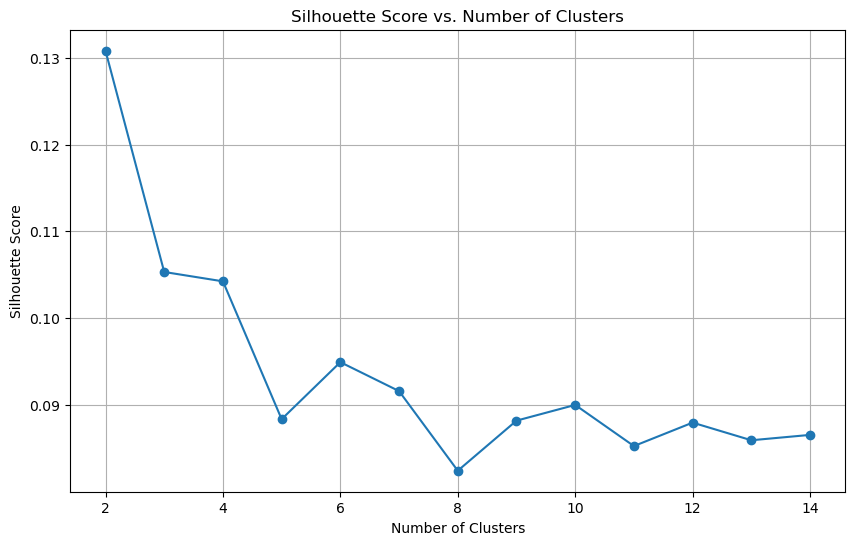

In [16]:
cluster_range = range(2, 15)

# List to store silhouette scores
silhouette_scores = []

for num_clusters in cluster_range:
    # Initialize the hierarchical clustering model
    hc_model = AgglomerativeClustering(n_clusters=num_clusters)
    
    # Fit the model to the data and obtain cluster labels
    cluster_labels = hc_model.fit_predict(clusteringDFClean)
    
    # Calculate the silhouette score
    score = silhouette_score(clusteringDFClean, cluster_labels)
    silhouette_scores.append(score)

# Plot the evaluation results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)

plt.savefig("Silhoute.png")
plt.show()

#Internal method to meaured chosen was silhouete which varies between -1 and 1,
#where a higher value indicates better defined clusters

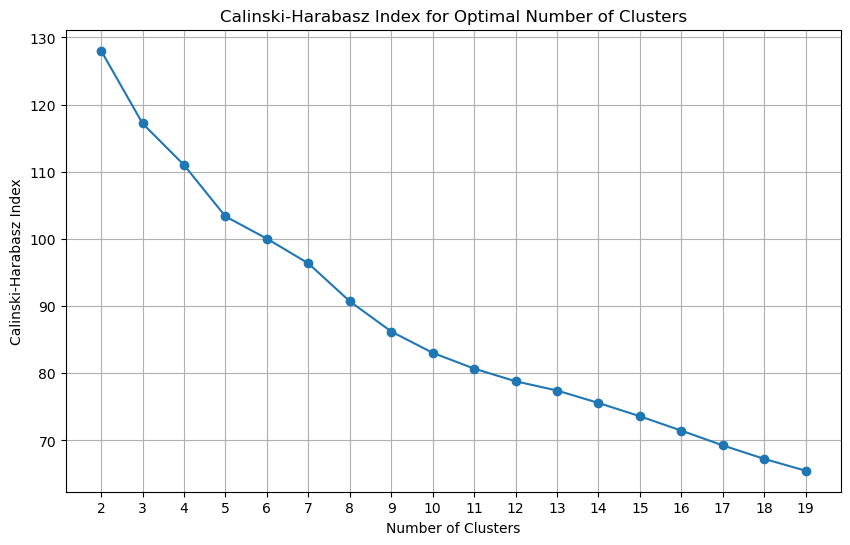

In [17]:
from sklearn.metrics import calinski_harabasz_score
num_clusters_range = range(2, 20)

# List to store the Calinski-Harabasz Index values for each number of clusters
ch_scores = []

for num_clusters in num_clusters_range:
    hc_model = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hc_model.fit_predict(clusteringDFClean)
    ch_score = calinski_harabasz_score(clusteringDFClean, cluster_labels)
    ch_scores.append(ch_score)

# Plot the Calinski-Harabasz Index values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal Number of Clusters')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.savefig("Calinski.png")

plt.show()

# Hierarchical Clustering - good !

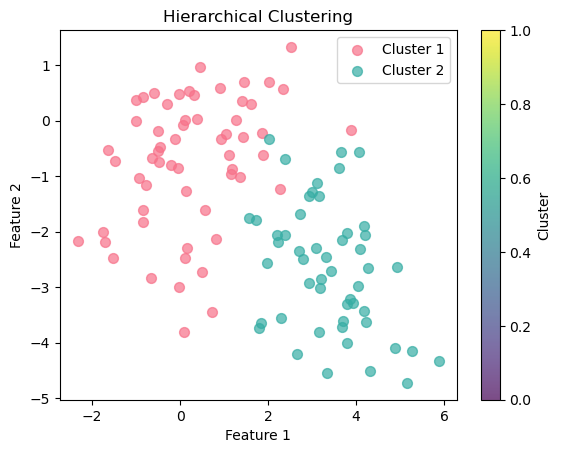

In [25]:
palette = sns.color_palette("husl", 2)

for cluster in range(2):
    plt.scatter(clusteringDFClean.iloc[cluster_labels == cluster, 0], 
                clusteringDFClean.iloc[cluster_labels == cluster, 1], 
                color=palette[cluster], s=50, alpha=0.7, label=f'Cluster {cluster + 1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.legend()

plt.colorbar(label='Cluster')

plt.savefig("Hierarchical Clustering.png")

plt.show()


# d) According to Calinksi-Harabasz index and silhouete, the best number of clusters seems to be 2.

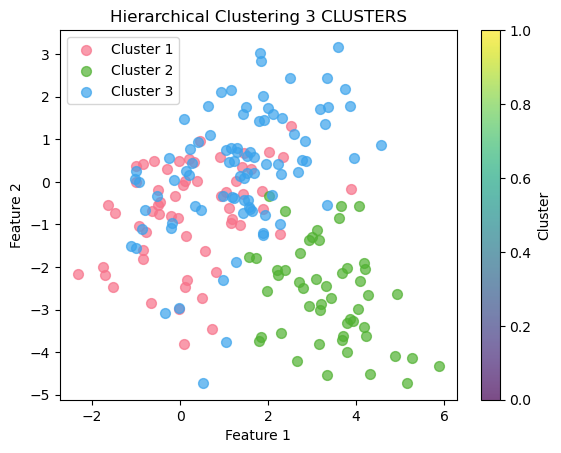

In [29]:
palette = sns.color_palette("husl", 3)  # Use 3 colors for 3 clusters

for cluster in range(3):  # Loop over 3 clusters
    plt.scatter(clusteringDFClean.iloc[cluster_labels == cluster, 0], 
                clusteringDFClean.iloc[cluster_labels == cluster, 1], 
                color=palette[cluster], s=50, alpha=0.7, label=f'Cluster {cluster + 1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering 3 CLUSTERS')
plt.legend()

plt.colorbar(label='Cluster')

# plt.savefig("Hierarchical Clustering.png")

plt.show()
